# EDA Credit Case Study #

### Problem Understanding ###

### Problem Objectives ###

### Importing the Datasets ###

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

In [3]:
# Read the current application csv file
application_data= pd.read_csv("application_data.csv")

In [4]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# Check the number of rows and columns in the dataframe
application_data.shape

(307511, 122)

In [6]:
pd.set_option("max_rows",200)
pd.set_option("max_columns",200)

In [7]:
# Checking the columns in the dataset
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
application_data.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
OWN_CAR_AGE                     104582
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE         

In [11]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
# checking the lenght of the dataframe
len(application_data)

307511

In [13]:
#Checking the top 60 variables having missing values
application_data.isnull().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [14]:
# Check the shape of the dataframe
application_data.shape

(307511, 122)

In [15]:
#Extracting 50% of the length of dataset
x= len(application_data)/2
x

153755.5

In [16]:
type(application_data)

pandas.core.frame.DataFrame

In [17]:
#Columns that contains less than 50% of its values as null
application_data.columns[application_data.isnull().sum()< x]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [18]:
# Number of columns left after deleting the columns which had more than 50% NA Values
application_data= application_data[application_data.columns[application_data.isnull().sum()< 153755]]
application_data.shape

(307511, 81)

In [19]:
#Checking the top 60 Columns with Null Values
application_data.isnull().sum().sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [20]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [21]:
# Categorical columns are:
list(set(application_data.columns) - set(application_data.describe().columns))

['NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER']

In [22]:
# Numerical columns are:
application_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [23]:
application_data.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE                307511
FLAG_PHONE               

In [24]:
application_data.missing= application_data.count()/len(application_data)
application_data.missing

SK_ID_CURR                      1.000000
TARGET                          1.000000
NAME_CONTRACT_TYPE              1.000000
CODE_GENDER                     1.000000
FLAG_OWN_CAR                    1.000000
FLAG_OWN_REALTY                 1.000000
CNT_CHILDREN                    1.000000
AMT_INCOME_TOTAL                1.000000
AMT_CREDIT                      1.000000
AMT_ANNUITY                     0.999961
AMT_GOODS_PRICE                 0.999096
NAME_TYPE_SUITE                 0.995799
NAME_INCOME_TYPE                1.000000
NAME_EDUCATION_TYPE             1.000000
NAME_FAMILY_STATUS              1.000000
NAME_HOUSING_TYPE               1.000000
REGION_POPULATION_RELATIVE      1.000000
DAYS_BIRTH                      1.000000
DAYS_EMPLOYED                   1.000000
DAYS_REGISTRATION               1.000000
DAYS_ID_PUBLISH                 1.000000
FLAG_MOBIL                      1.000000
FLAG_EMP_PHONE                  1.000000
FLAG_WORK_PHONE                 1.000000
FLAG_CONT_MOBILE

In [25]:
application_data.missing= (1- application_data.missing)*100
application_data.missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [26]:
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

**Missing value treatment**

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns.

In [27]:
application_data['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [28]:
# finding the mean of FLOORSMAX_AVG
application_data['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [29]:
# finding the mode of FLOORSMAX_AVG
application_data['FLOORSMAX_AVG'].mode()

0    0.1667
dtype: float64

In [30]:
# Description of FLOORSMAX_AVG
application_data['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

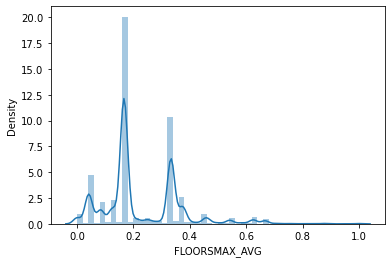

In [31]:
#Plotting the distribution of FLOORSMAX_AVG
sns.distplot(application_data['FLOORSMAX_AVG'])
plt.show()

In [32]:
# Replacing Null values with median of FLOORSMAX_AVG
application_data['FLOORSMAX_AVG'].fillna(application_data['FLOORSMAX_AVG'].median(), inplace=True)

In [33]:
# Checking the Null values in column FLOORSMAX_AVG
application_data['FLOORSMAX_AVG'].isna().sum()

0

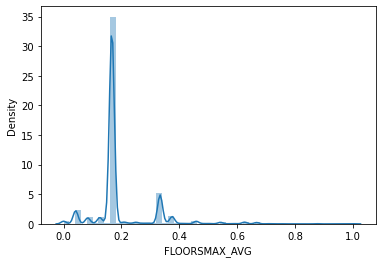

In [34]:
#Plotting the distribution of FLOORSMAX_AVG after imputing the NA Values
sns.distplot(application_data['FLOORSMAX_AVG'])
plt.show()

In [35]:
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [36]:
application_data['FLOORSMAX_MEDI'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [37]:
# finding the mean of FLOORSMAX_MEDI
application_data['FLOORSMAX_MEDI'].mean()

0.22589659009280993

In [38]:
# finding the mode of FLOORSMAX_MEDI
application_data['FLOORSMAX_MEDI'].mode()

0    0.1667
dtype: float64

In [39]:
# Replacing Null values with median of FLOORSMAX_MEDI
application_data['FLOORSMAX_MEDI'].fillna(application_data['FLOORSMAX_MEDI'].median(), inplace=True)

In [40]:
# Checking the Null values in column FLOORSMAX_MEDI
application_data['FLOORSMAX_MEDI'].isna().sum()

0

In [41]:
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [42]:
application_data['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [43]:
application_data['FLOORSMAX_MODE'].mean()

0.22231504747867964

In [44]:
application_data['FLOORSMAX_MODE'].mode()

0    0.1667
dtype: float64

In [45]:
application_data['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

In [46]:
# Replacing Null values with mean of FLOORSMAX_MODE
application_data['FLOORSMAX_MODE'].fillna(application_data['FLOORSMAX_MODE'].mean(), inplace=True)

In [47]:
# Checking the Null values in column FLOORSMAX_MODE
application_data['FLOORSMAX_MODE'].isna().sum()

0

In [48]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [49]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].mean()

0.9777348581622732

In [50]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].mode()

0    0.9871
dtype: float64

In [51]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [52]:
# Replacing Null values with mean of YEARS_BEGINEXPLUATATION_AVG
application_data['YEARS_BEGINEXPLUATATION_AVG'].fillna(application_data['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)

In [53]:
# Checking the Null values in column YEARS_BEGINEXPLUATATION_AVG
application_data['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

In [54]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [55]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].mean()

0.9777522640694213

In [56]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [57]:
# Replacing Null values with mean of YEARS_BEGINEXPLUATATION_MEDI
application_data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application_data['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)

In [58]:
# Checking the Null values in column YEARS_BEGINEXPLUATATION_MEDI
application_data['YEARS_BEGINEXPLUATATION_MEDI'].isna().sum()

0

In [59]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [60]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.9770653729428284

In [61]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [62]:
# Replacing Null values with mean of YEARS_BEGINEXPLUATATION_MODE
application_data['YEARS_BEGINEXPLUATATION_MODE'].fillna(application_data['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace=True)

In [63]:
# Checking the Null values in column YEARS_BEGINEXPLUATATION_MODE
application_data['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

In [64]:
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [65]:
application_data['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [66]:
application_data['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [67]:
application_data['TOTALAREA_MODE'].mean()

0.10254666268544003

In [68]:
# Replacing Null values with median of TOTALAREA_MODE
application_data['TOTALAREA_MODE'].fillna(application_data['TOTALAREA_MODE'].median(), inplace=True)

In [69]:
# Checking the Null values in column TOTALAREA_MODE
application_data['TOTALAREA_MODE'].isna().sum()

0

In [70]:
application_data['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [71]:
application_data['EMERGENCYSTATE_MODE'].mode()

0    No
dtype: object

In [72]:
# Replacing Null values with mode of EMERGENCYSTATE_MODE
application_data['EMERGENCYSTATE_MODE'].fillna(application_data['EMERGENCYSTATE_MODE'].mode().iloc[0], inplace=True)

In [73]:
application_data['EMERGENCYSTATE_MODE'].isna().sum()

0

In [74]:
# Checking the missing values of application data
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

**Column:OCCUPATION TYPE**

As you can see, OCCUPATION TYPE column has 31% missing data, which is also a huge number. So, it would be appropriate to remove this column, but if you go through this column, this seems to look important. So, let us explore this column.

In [75]:
# Checking OCCUPATION_TYPE column
application_data['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [76]:
application_data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [77]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [78]:
application_data['OCCUPATION_TYPE'].isnull().sum()

96391

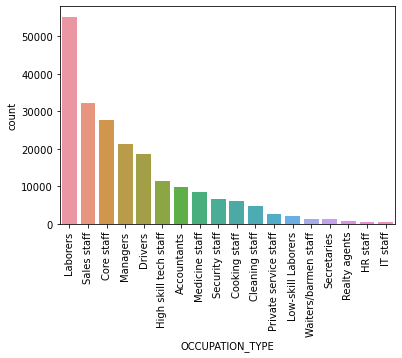

In [79]:
#plot using countplot to understand the OCCUPATION_TYPE
sns.countplot(x='OCCUPATION_TYPE',data= application_data, order= application_data.OCCUPATION_TYPE.value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Insights:** We can see that the majority of the individuals applying for loans are labourers, Sales Staffs and Core Staffs.
We find that the HR Staff, IT Staff and Secretaries have least interest in taking loans.

In [80]:
# Analysing the Occupation Type based on the Income using Pivot Table
Avg_income= pd.pivot_table(index='OCCUPATION_TYPE',data= application_data,aggfunc='mean')
Avg_income= Avg_income.sort_values(by='AMT_INCOME_TOTAL',ascending=True)
Avg_income['AMT_INCOME_TOTAL'].head(20)

OCCUPATION_TYPE
Cleaning staff           130790.895551
Low-skill Laborers       133228.001911
Cooking staff            138396.508176
Waiters/barmen staff     144272.583828
Security staff           149662.695953
Medicine staff           149709.643434
Sales staff              152302.874710
Secretaries              160541.662069
Laborers                 166357.482525
Core staff               172656.695254
Private service staff    182334.812783
High skill tech staff    182842.045683
Drivers                  187011.606413
HR staff                 188916.282416
Accountants              194578.357842
Realty agents            195003.994674
IT staff                 213465.601711
Managers                 260336.681717
Name: AMT_INCOME_TOTAL, dtype: float64

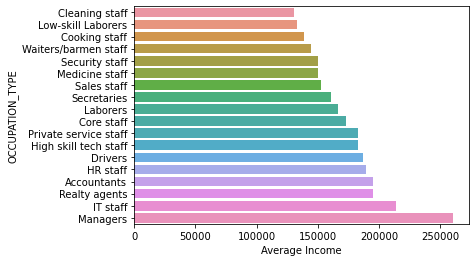

In [81]:
#Plotting the barplot Aerage Income with respect to Occupation
sns.barplot(data=Avg_income,x=Avg_income['AMT_INCOME_TOTAL'],y=Avg_income.index)
plt.xlabel('Average Income')
plt.show() 

**Insights:** The Manager salary is higher compared with other occcupation types.
Cleaning Staffs  and low skilled labourers recieve the least Income.



In [82]:
application_data['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

As you can see that this column has considerable percentage of missing values, that is 31%. Since it is a categorrical column, we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will not be fair. So, we will leave it as it is and will not do any missing value treatment here.

In [83]:
# Checking the missing values of application data
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [84]:
application_data['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

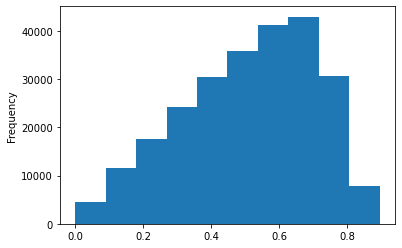

In [85]:
#plot using histtplot to understand the EXT_SOURCE_3
application_data['EXT_SOURCE_3'].plot.hist()
plt.show()

This data is slightly a skewed normal distribution.


In [86]:
application_data['EXT_SOURCE_3'].mean()

0.5108529061800121

In [87]:
application_data['EXT_SOURCE_3'].median()

0.5352762504724826

In [88]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

As you can see that this column 'EXT_SOURCE_3' has a percentage of missing values, that is 19.82%.This column is normalized score from external data source. As we don't know what it is and how it was obtained, predicting the missing values here also might lead to exaggeration of data. So, we will leave it as it is and will not do any missing value treatment here.


In [89]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [90]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [91]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

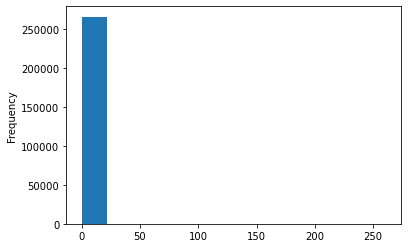

In [92]:
#plot using histogram to understand the AMT_REQ_CREDIT_BUREAU_QRT
num_unique_values= len(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins=num_unique_values)
plt.show()

In [93]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

Since the column only takes very few discrete values and since mode is 0, so we cannot  replace it by mean value. Here we will replace it by mode. 

In [94]:
# Replacing Null values with mode of AMT_REQ_CREDIT_BUREAU_QRT
application_data['AMT_REQ_CREDIT_BUREAU_QRT']= application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0])

In [95]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

In [96]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [97]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [98]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

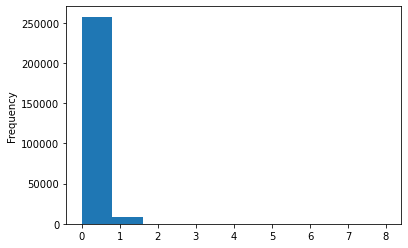

In [99]:
#plot using histtplot to understand the AMT_REQ_CREDIT_BUREAU_WEEK
num_unique_values= len(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins=num_unique_values)
plt.show()

In [100]:
# Replacing Null values with mode of AMT_REQ_CREDIT_BUREAU_WEEK
application_data['AMT_REQ_CREDIT_BUREAU_WEEK']= application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode().iloc[0])

In [101]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

As you can see, mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore this column for analysis.

In [102]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [103]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [104]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

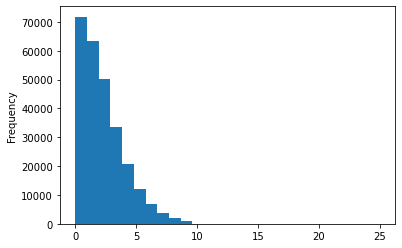

In [105]:
#plot using histtplot to understand the AMT_REQ_CREDIT_BUREAU_YEAR
num_unique_values= len(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins=num_unique_values)
plt.show()

In [106]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [107]:
# Replacing Null values with mean of AMT_REQ_CREDIT_BUREAU_YEAR
application_data['AMT_REQ_CREDIT_BUREAU_YEAR']= application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())

In [108]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [109]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [110]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [111]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

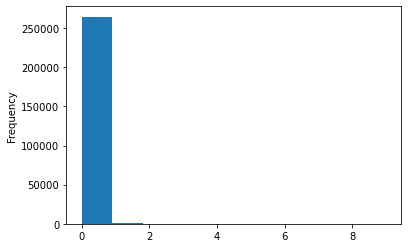

In [112]:
#plot using histtplot to understand the AMT_REQ_CREDIT_BUREAU_DAY
num_unique_values= len(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins=num_unique_values)
plt.show()

In [113]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
dtype: float64

In [114]:
# Replacing Null values with mode of AMT_REQ_CREDIT_BUREAU_DAY
application_data['AMT_REQ_CREDIT_BUREAU_DAY']= application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode().iloc[0])

In [115]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

In [116]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [117]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()


array([ 0., nan,  1.,  2.,  3.,  4.])

In [118]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

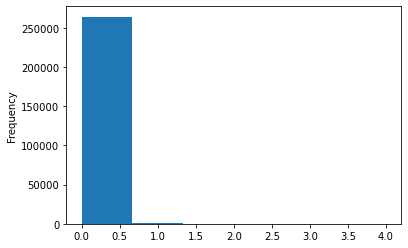

In [119]:
#plot using histtplot to understand the AMT_REQ_CREDIT_BUREAU_HOUR
num_unique_values= len(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins=num_unique_values)
plt.show()

In [120]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
dtype: float64

In [121]:
# Replacing Null values with mode of AMT_REQ_CREDIT_BUREAU_HOUR
application_data['AMT_REQ_CREDIT_BUREAU_HOUR']= application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode().iloc[0])

In [122]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

In [123]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [124]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].unique()

array([ 0., nan,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16.,
       12., 14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

In [125]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

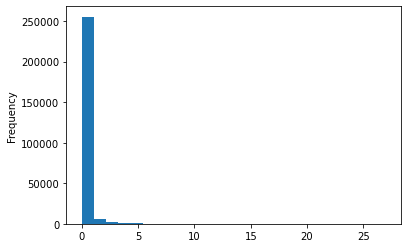

In [126]:
#plot using histtplot to understand the AMT_REQ_CREDIT_BUREAU_MON
num_unique_values= len(application_data['AMT_REQ_CREDIT_BUREAU_MON'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins=num_unique_values)
plt.show()

In [127]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
dtype: float64

In [128]:
# Replacing Null values with mode of AMT_REQ_CREDIT_BUREAU_WEEK
application_data['AMT_REQ_CREDIT_BUREAU_MON']= application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode().iloc[0])

In [129]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

In [130]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [131]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [132]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

In [133]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788705

In [134]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [135]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

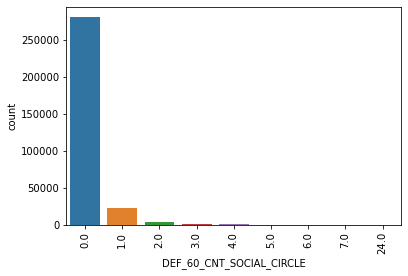

In [136]:
#plot using countplot to understand the DEF_60_CNT_SOCIAL_CIRCLE
sns.countplot(x= 'DEF_60_CNT_SOCIAL_CIRCLE', data= application_data)
plt.xticks(rotation=90)
plt.show()

In [137]:
# Replacing Null values with mode of DEF_60_CNT_SOCIAL_CIRCLE
application_data['DEF_60_CNT_SOCIAL_CIRCLE']=application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [138]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [139]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [140]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [141]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [142]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

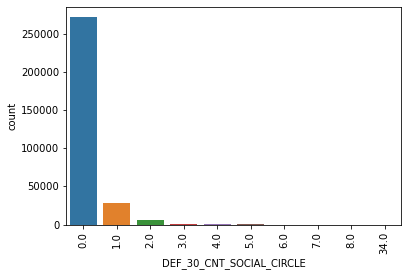

In [143]:
#plot using countplot to understand the DEF_30_CNT_SOCIAL_CIRCLE
sns.countplot(x= 'DEF_30_CNT_SOCIAL_CIRCLE', data= application_data)
plt.xticks(rotation=90)
plt.show()

In [144]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [145]:
# Replacing Null values with mode of DEF_30_CNT_SOCIAL_CIRCLE
application_data['DEF_30_CNT_SOCIAL_CIRCLE']=application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [146]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [147]:
# Checking the missing values of application data
application_data.missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [148]:
application_data['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [149]:
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [150]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

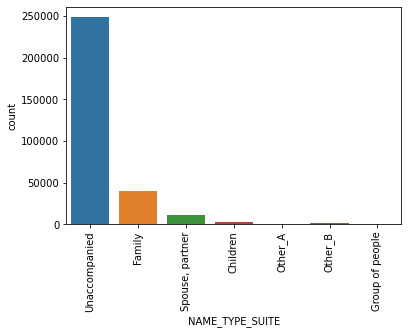

In [151]:
#plot using countplot to understand the NAME_TYPE_SUITE
sns.countplot(x= 'NAME_TYPE_SUITE', data= application_data)
plt.xticks(rotation=90)
plt.show()

From the plot, we observe that Unaccompanied category has the highest number of loan applicants which means most of the loan applicants venture out alone for applying loan.

In [152]:
application_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [153]:
# Replacing Null values with mode of NAME_TYPE_SUITE
application_data['NAME_TYPE_SUITE']=application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode().iloc[0])

In [154]:
application_data['NAME_TYPE_SUITE'].isna().sum()

0

In [155]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [156]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [157]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

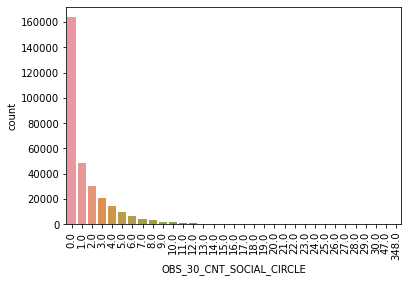

In [158]:
#plot using countplot to understand the OBS_30_CNT_SOCIAL_CIRCLE
sns.countplot(x= 'OBS_30_CNT_SOCIAL_CIRCLE', data= application_data)
plt.xticks(rotation=90)
plt.show()

In [159]:
# Replacing Null values with mode of OBS_30_CNT_SOCIAL_CIRCLE
application_data['OBS_30_CNT_SOCIAL_CIRCLE']=application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [160]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [161]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [162]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [163]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

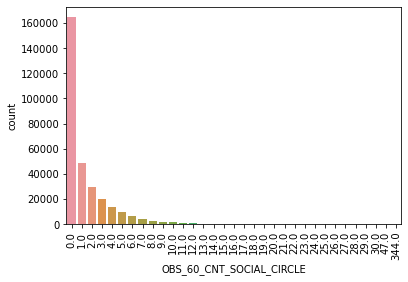

In [164]:
#plot using countplot to understand the OBS_60_CNT_SOCIAL_CIRCLE
sns.countplot(x= 'OBS_60_CNT_SOCIAL_CIRCLE', data= application_data)
plt.xticks(rotation=90)
plt.show()

In [165]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [166]:
# Replacing Null values with mode of OBS_60_CNT_SOCIAL_CIRCLE
application_data['OBS_60_CNT_SOCIAL_CIRCLE']=application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [167]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [168]:
application_data['EXT_SOURCE_2'].head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [169]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [170]:
application_data['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

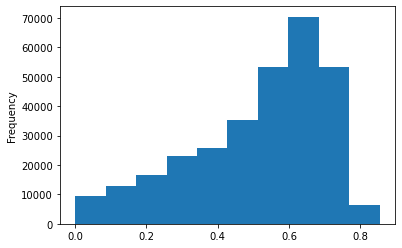

In [171]:
#plot using histtplot to understand the EXT_SOURCE_2
application_data['EXT_SOURCE_2'].plot.hist()
plt.show()

This data is slightly a skewed normal distribution.

In [172]:
application_data['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [173]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [174]:
application_data['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

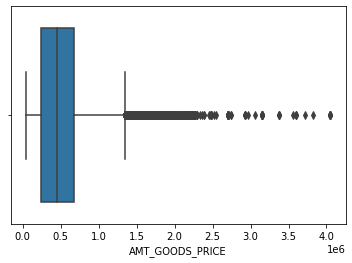

In [175]:
#plot using boxplot to understand the AMT_GOODS_PRICE
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()


In [176]:
application_data['AMT_GOODS_PRICE'].median()

450000.0

In [177]:
# Replacing Null values with median of AMT_GOODS_PRICE
application_data['AMT_GOODS_PRICE']=application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median())

In [178]:
application_data['AMT_GOODS_PRICE'].isna().sum()

0

In [179]:
# Categorical columns are:
list(set(application_data.columns) - set(application_data.describe().columns))

['NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER']

In [180]:
# Numerical columns are:
application_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [181]:
#Treatng the categorical columns that have null values by replacing the Categorical columns with Mode
cols= list(set(application_data.columns) - set(application_data.describe().columns))
application_data[cols]= application_data[cols].fillna(application_data.mode().iloc[0])

In [182]:
application_data[cols].isna().sum()

NAME_FAMILY_STATUS            0
FLAG_OWN_REALTY               0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
NAME_HOUSING_TYPE             0
FLAG_OWN_CAR                  0
NAME_INCOME_TYPE              0
NAME_CONTRACT_TYPE            0
EMERGENCYSTATE_MODE           0
NAME_TYPE_SUITE               0
NAME_EDUCATION_TYPE           0
CODE_GENDER                   0
dtype: int64

In [183]:
application_data[application_data.describe().columns].isna().sum().tolist

<bound method IndexOpsMixin.tolist of SK_ID_CURR                          0
TARGET                              0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                     0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT

In [184]:
nulls= application_data.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                  12
CNT_FAM_MEMBERS               2
EXT_SOURCE_2                660
EXT_SOURCE_3              60965
DAYS_LAST_PHONE_CHANGE        1
dtype: int64

In [185]:
application_data.median()

SK_ID_CURR                      278202.000000
TARGET                               0.000000
CNT_CHILDREN                         0.000000
AMT_INCOME_TOTAL                147150.000000
AMT_CREDIT                      513531.000000
AMT_ANNUITY                      24903.000000
AMT_GOODS_PRICE                 450000.000000
REGION_POPULATION_RELATIVE           0.018850
DAYS_BIRTH                      -15750.000000
DAYS_EMPLOYED                    -1213.000000
DAYS_REGISTRATION                -4504.000000
DAYS_ID_PUBLISH                  -3254.000000
FLAG_MOBIL                           1.000000
FLAG_EMP_PHONE                       1.000000
FLAG_WORK_PHONE                      0.000000
FLAG_CONT_MOBILE                     1.000000
FLAG_PHONE                           0.000000
FLAG_EMAIL                           0.000000
CNT_FAM_MEMBERS                      2.000000
REGION_RATING_CLIENT                 2.000000
REGION_RATING_CLIENT_W_CITY          2.000000
HOUR_APPR_PROCESS_START           

In [186]:
cols1 = list(set(application_data.describe().columns))
application_data[cols1] = application_data[cols1].fillna(application_data.median().iloc[0])

In [187]:
application_data.fillna(application_data.median(),inplace=True)

In [188]:
application_data.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

#### Data Set is Clean ####

In [189]:
# Converting negative values to positive values,to standard format using abs()

application_data['DAYS_BIRTH']=application_data.DAYS_BIRTH.abs()
application_data['DAYS_EMPLOYED']=application_data.DAYS_EMPLOYED.abs()
application_data['DAYS_ID_PUBLISH']=application_data.DAYS_ID_PUBLISH.abs()
application_data['DAYS_LAST_PHONE_CHANGE']=application_data.DAYS_LAST_PHONE_CHANGE.abs()
application_data['DAYS_REGISTRATION']=application_data.DAYS_REGISTRATION.abs()
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [190]:
application_data['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [191]:
#creating AGE Column by converting to years
application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].apply(lambda x: int(x/365))
application_data= application_data.rename({"DAYS_BIRTH":"YEARS_BIRTH"},axis=1)

In [192]:
application_data['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

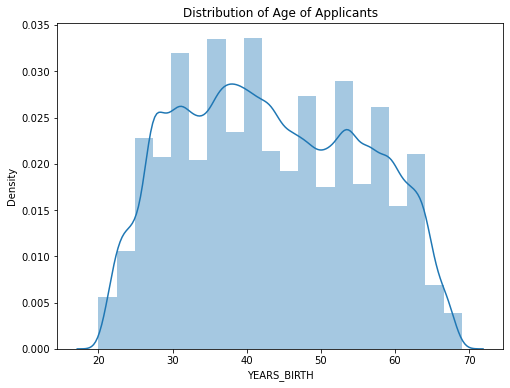

In [193]:
#plot using distplot to understand the YEARS_BIRTH
plt.figure(figsize=(8,6))
sns.distplot(application_data['YEARS_BIRTH'],bins = 20)
plt.title("Distribution of Age of Applicants")
plt.show()

**Insight:** maximum age of the applicant is 69 and the minimum age of the applicant is 20. It is also observed that more number of people in the age between 30 and 45 apply for loans.

In [194]:
# Analysing the Education Type of the Applicants
application_data['NAME_EDUCATION_TYPE'].head()

0    Secondary / secondary special
1                 Higher education
2    Secondary / secondary special
3    Secondary / secondary special
4    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

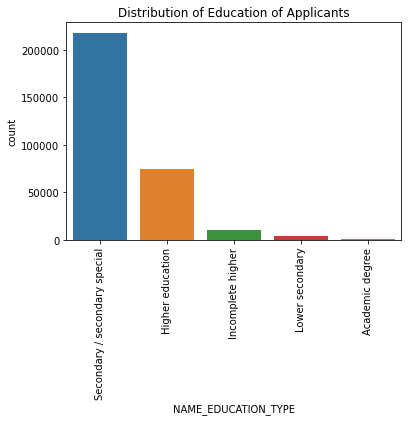

In [195]:
#plot using countplot to understand the Education Type of the Applicants
sns.countplot(application_data['NAME_EDUCATION_TYPE'])
plt.title('Count of contract Type',size=14)
plt.title("Distribution of Education of Applicants")
plt.xticks(rotation=90)
plt.show()

**Insights:** We can see that education group - Secondary/Secondary special are having highest requirements for loan, followed by higher education, incomplete higher and so on.

In [196]:
# Checking value counts in Gender field
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [197]:
# Imputing XNA by F
application_data['CODE_GENDER']= application_data['CODE_GENDER'].apply(lambda x:'F' if x=='XNA' else x)

In [198]:
# Re-checking value counts in Gender field after dropping XNA
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

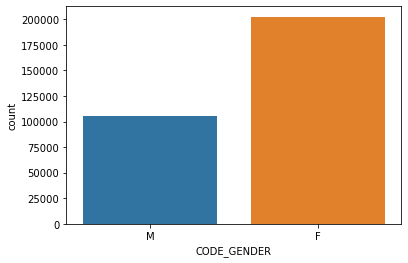

In [199]:
#plot using countplot to understand the Gender of the Applicants
sns.countplot(application_data['CODE_GENDER'])

The majority of the applicants are females as compared to males.

In [200]:
#Checking the Loan type and its count

application_data['NAME_CONTRACT_TYPE'].value_counts() 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

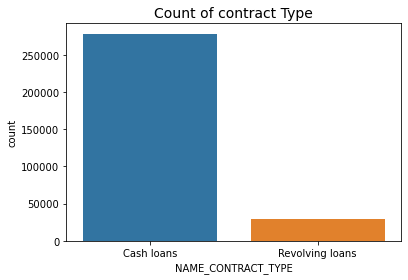

In [201]:
#plot using countplot to understand the contract type issued to the applicants
sns.countplot(application_data['NAME_CONTRACT_TYPE'])
plt.title('Count of contract Type',size=14)
plt.show()

**Insight** - More than 90% loans were given as Cash Loans to the applicants.

In [202]:
application_data['DAYS_EMPLOYED'].head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

In [203]:
application_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [204]:
application_data['DAYS_EMPLOYED'].value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
11555         1
14832         1
14719         1
13344         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [205]:
#creating DAYS_EMPLOYED Column by converting to years
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].apply(lambda x: int(x/365))
application_data= application_data.rename({"DAYS_EMPLOYED":"YEARS_EMPLOYED"},axis=1)

In [206]:
application_data['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

### Checking Imbalance ###

In [207]:
application_data['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

The data is clearly imbalanced. Around 92 % clients had payment difficulties and only 8 % are non -defaulters.

In [208]:
#checking exact Target 0 to Target 1 ratio
application_data[application_data['TARGET']==0].shape[0]/application_data[application_data['TARGET']==1].shape[0]

11.387150050352467

**Insight** : 1 in every 11 applicant has payment difficulty. DATA IMBALANCE DETECTED

In [209]:
#Analysing the Target Variable
application_data['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [210]:
application_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [211]:
#Client with payment difficulties
(application_data['TARGET']==1).sum()

24825

In [212]:
# Clients with on-time payments
(application_data['TARGET']==0).sum()

282686

In [213]:
application_data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [214]:
# Since there is a lot of imbalance lets separate out these
data_0= application_data.loc[application_data['TARGET']== 0]
data_1= application_data.loc[application_data['TARGET']== 1]

In [215]:
#categorical columns
cat_columns= list(set(application_data.columns) - set(application_data.describe().columns))
cat_columns

['NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER']

In [216]:
#numerical columns
num_columns= application_data.describe().columns
num_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    

In [217]:
# Selecting the categorical column based upon the data type
data_categorical= application_data.select_dtypes(include=['object']).columns
data_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [218]:
application_data.shape

(307511, 81)

# Univariate Analysis #

In [219]:
def plotting(data, data0, data1, column):
    
    data = data
    data_0= data0
    data_1= data1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1=plt.subplot(2,2,1)
    data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(2,2,2)
    application_data= pd.DataFrame()
    application_data['0'] = ((data_0[col].value_counts())/len(data_0))
    application_data['1'] = ((data_1[col].value_counts())/len(data_1))
    application_data.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')
    
    ax3 = plt.subplot(2,2,3)
    
    
    application_data['0'] = ((data_0[col].value_counts())/len(data_0))
    application_data['1'] = ((data_1[col].value_counts())/len(data_1))
    application_data.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    
    fig.tight_layout() #or equivalently, "plt.tight_Layout()"
    
    plt.show()

Plotting NAME_CONTRACT_TYPE


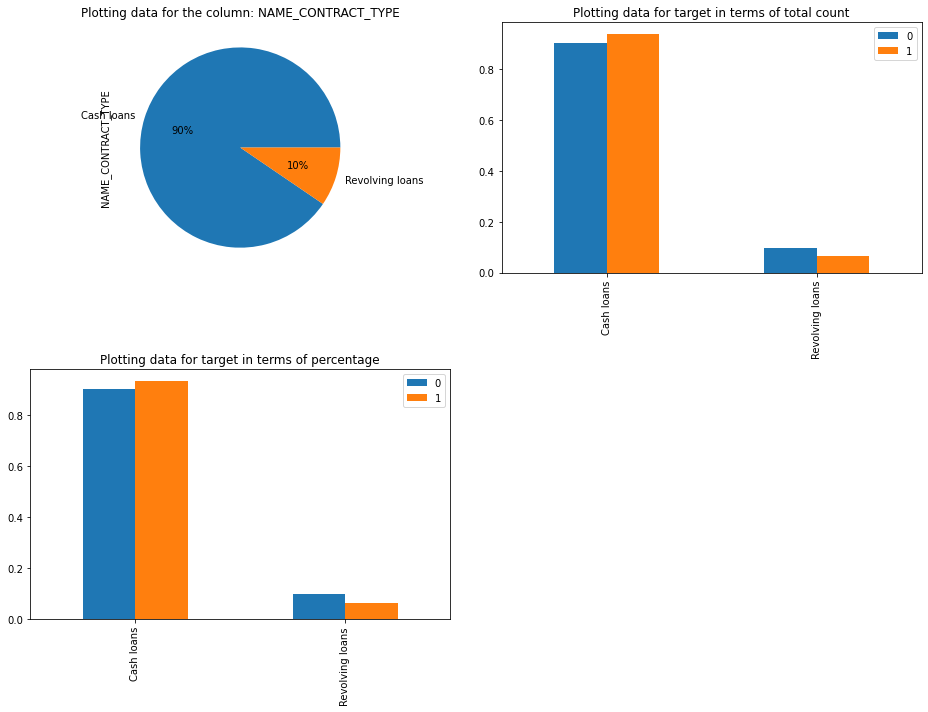

Plotting CODE_GENDER


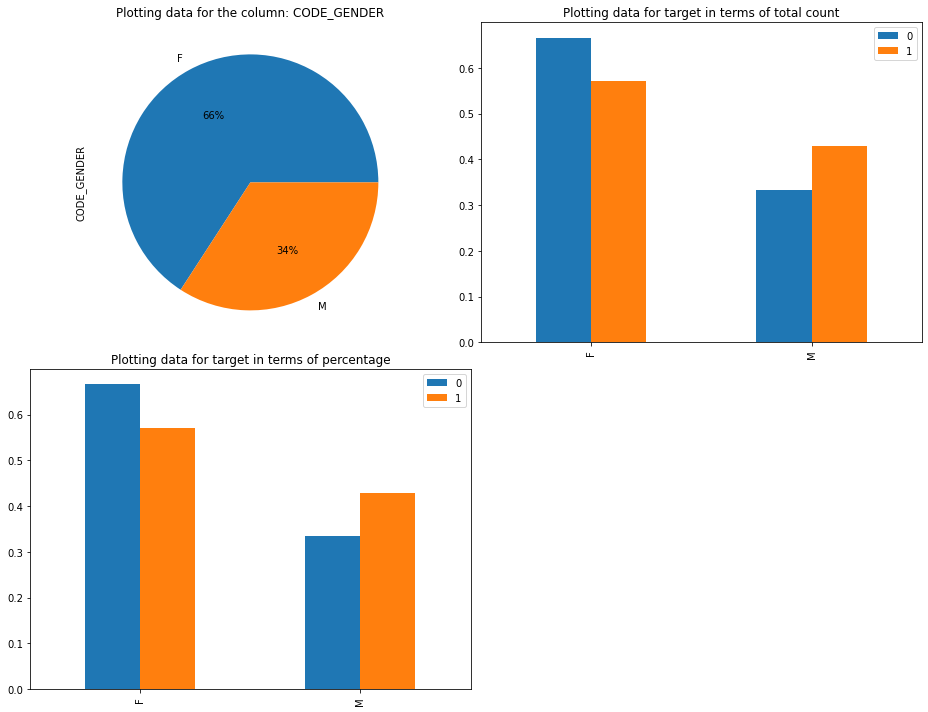

Plotting FLAG_OWN_CAR


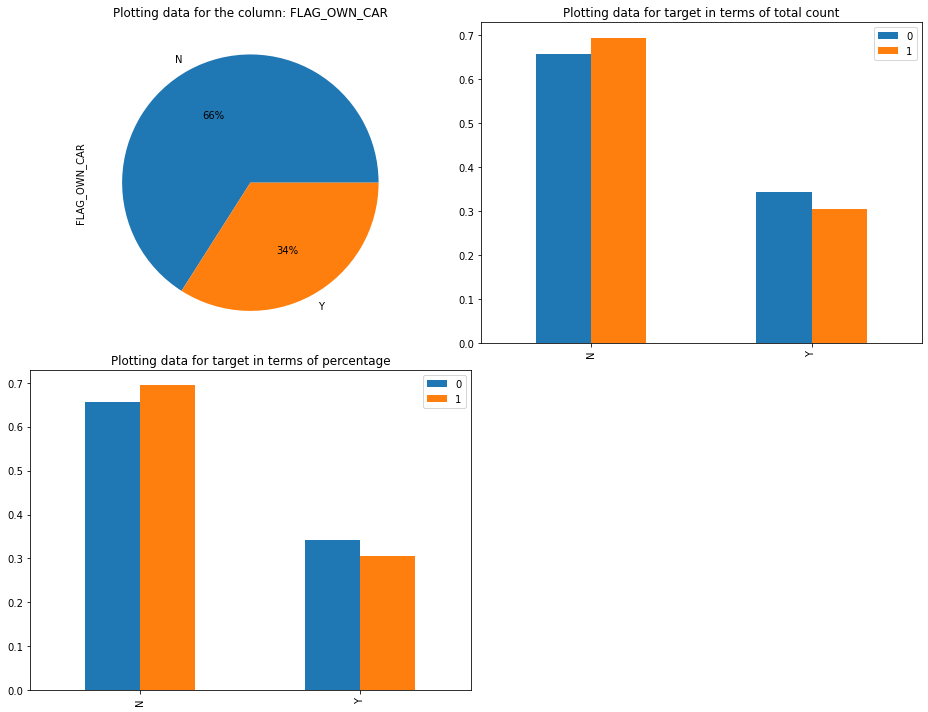

Plotting FLAG_OWN_REALTY


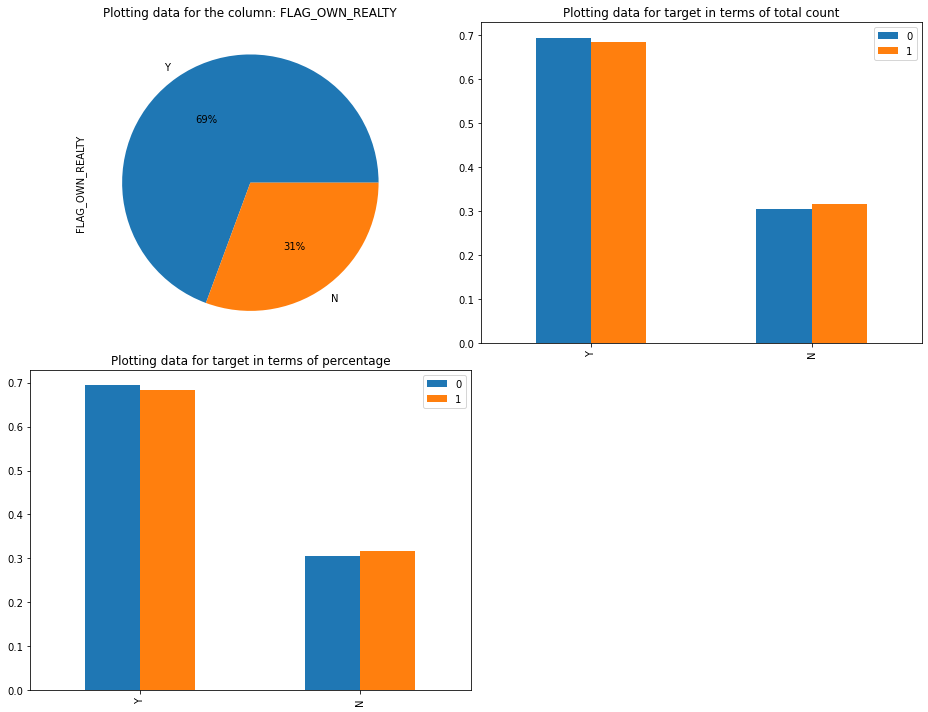

Plotting NAME_TYPE_SUITE


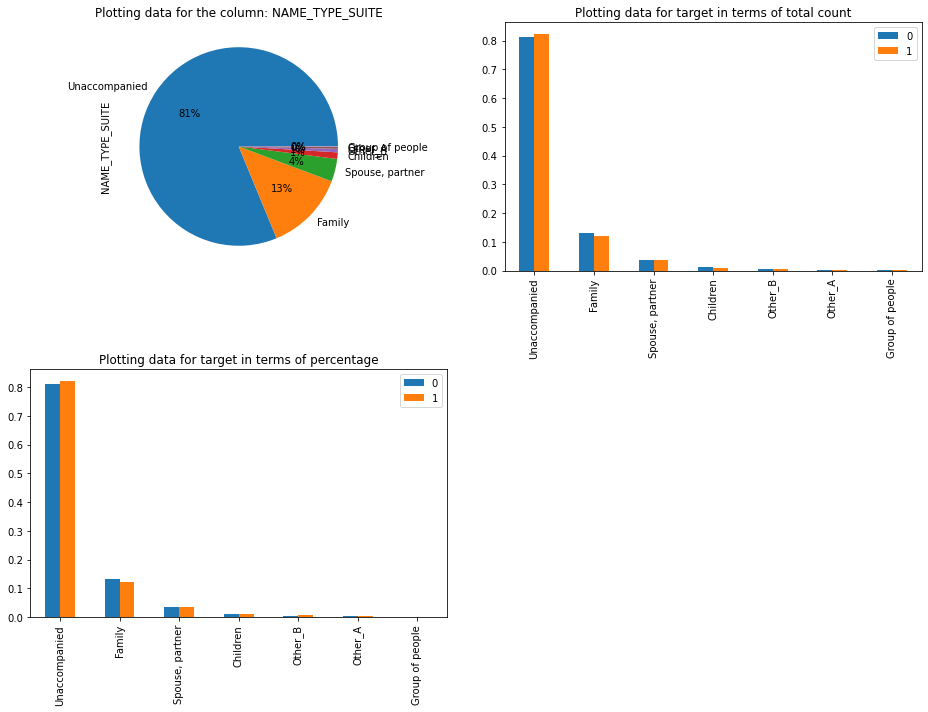

Plotting NAME_INCOME_TYPE


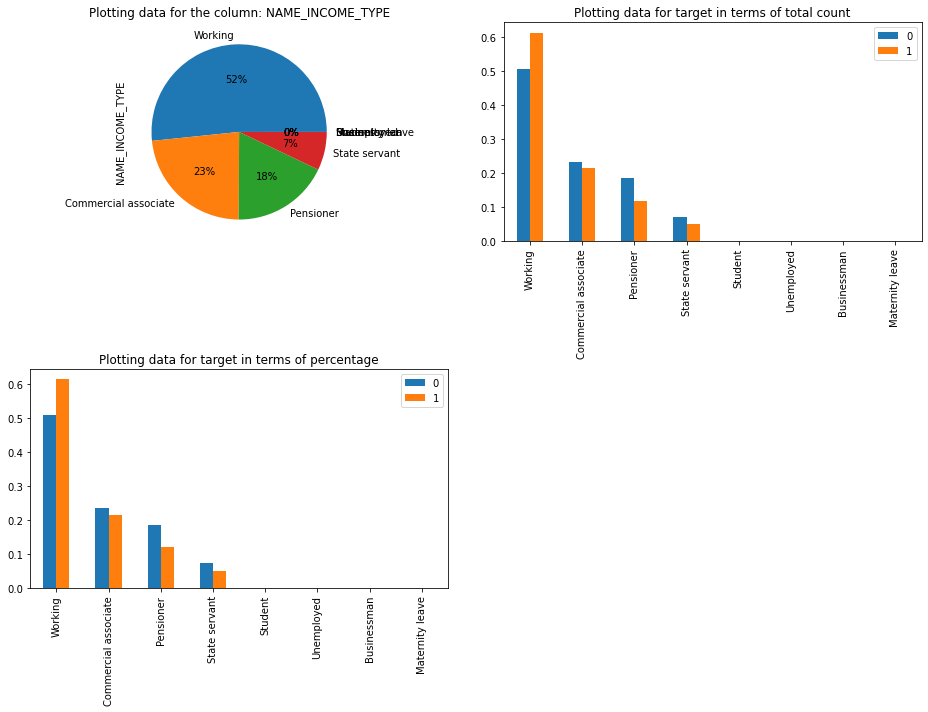

Plotting NAME_EDUCATION_TYPE


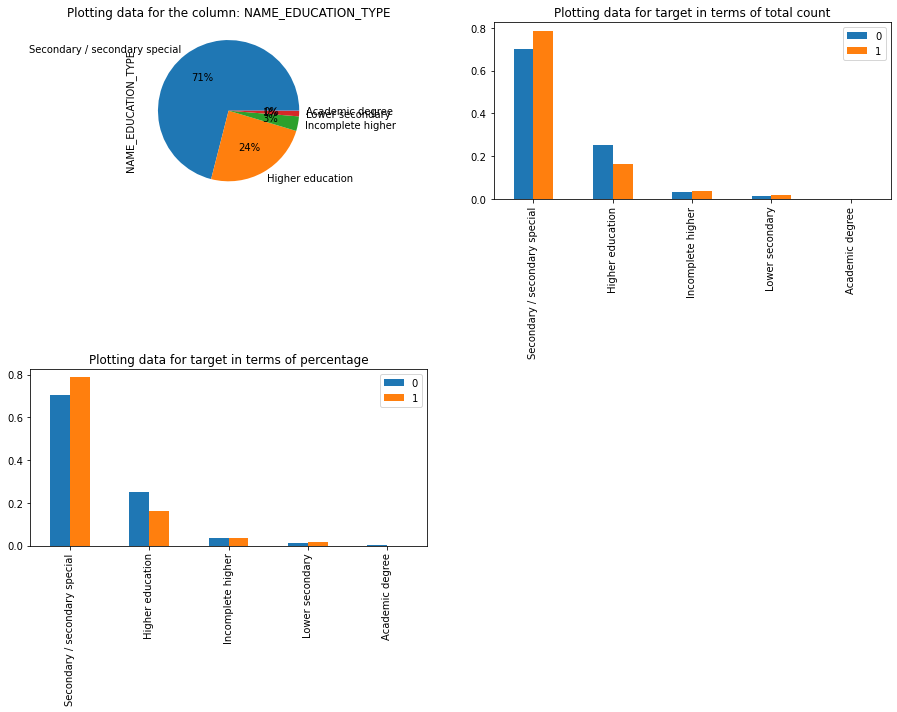

Plotting NAME_FAMILY_STATUS


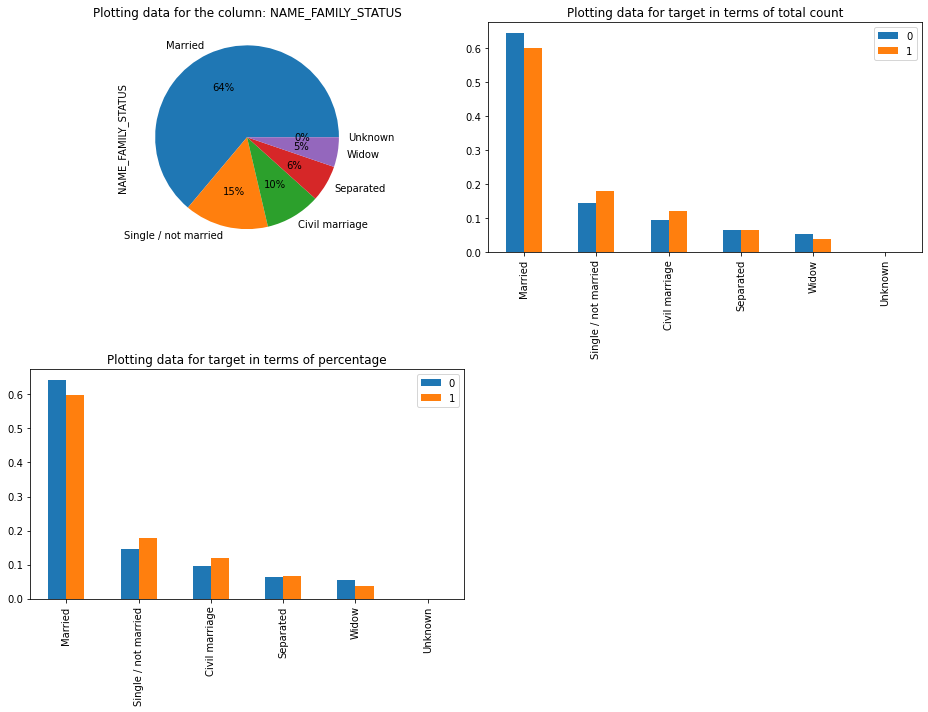

Plotting NAME_HOUSING_TYPE


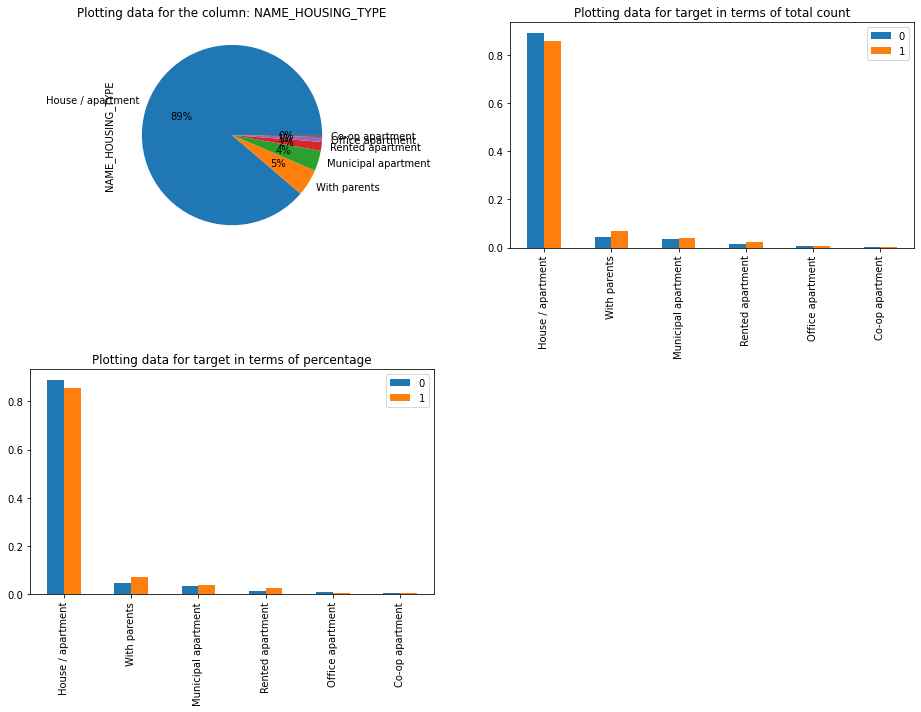

Plotting OCCUPATION_TYPE


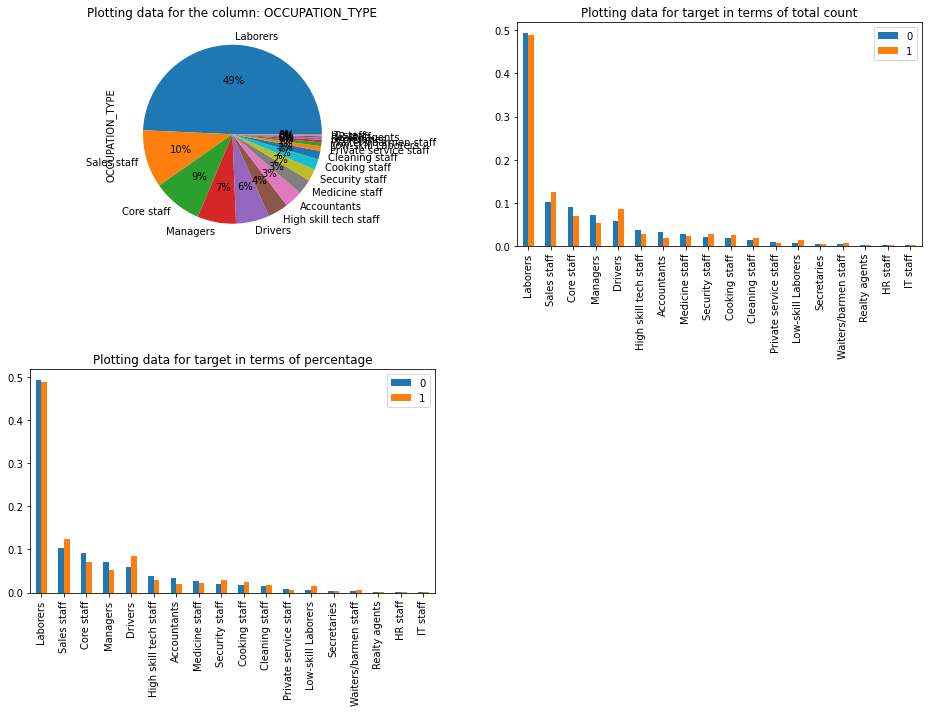

Plotting WEEKDAY_APPR_PROCESS_START


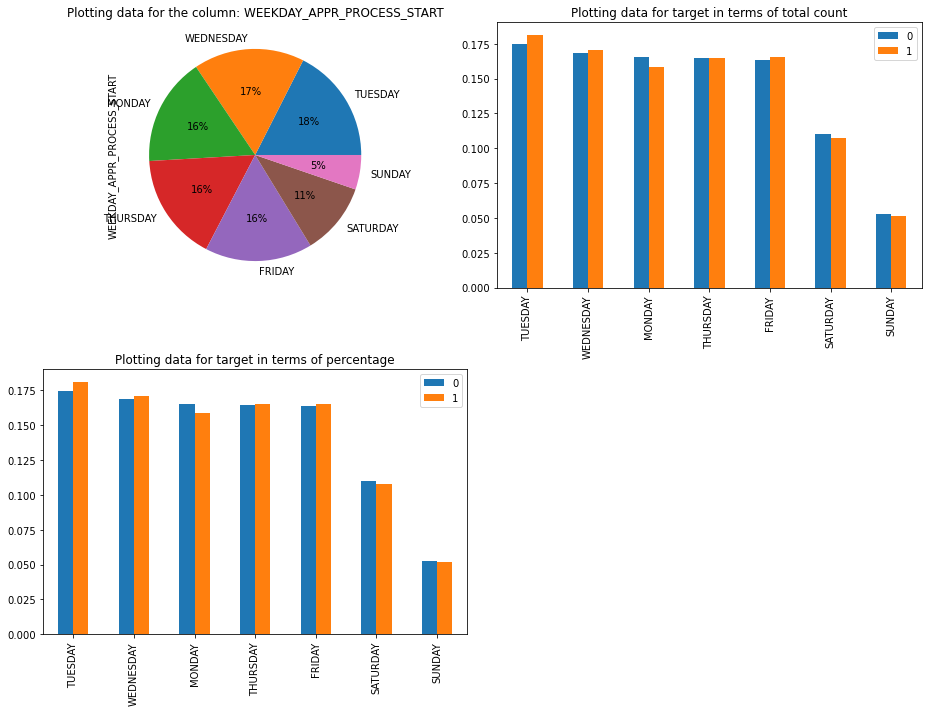

Plotting ORGANIZATION_TYPE


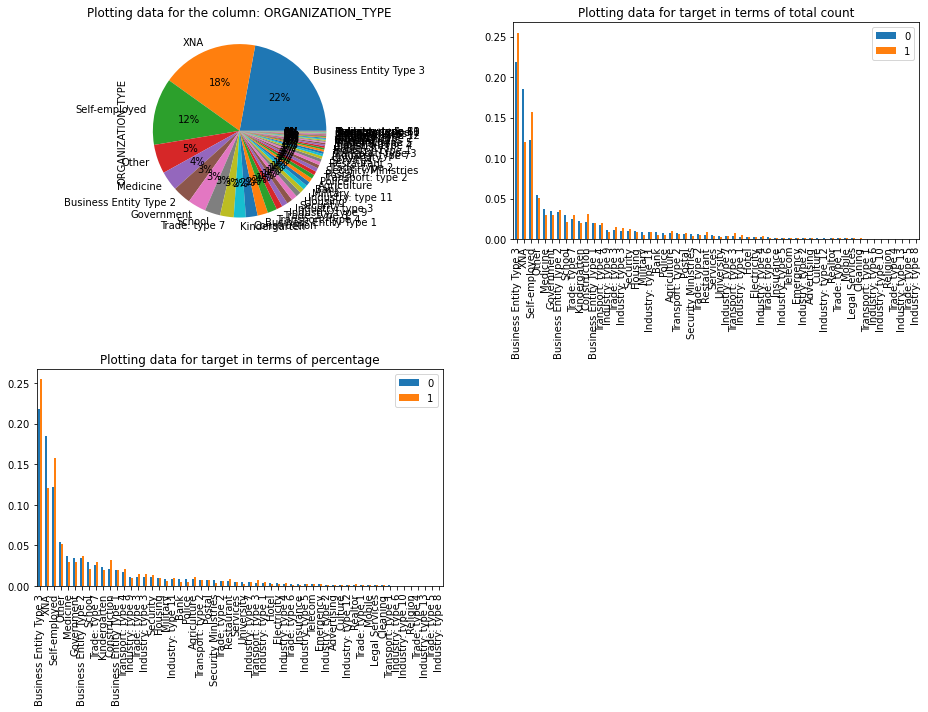

Plotting EMERGENCYSTATE_MODE


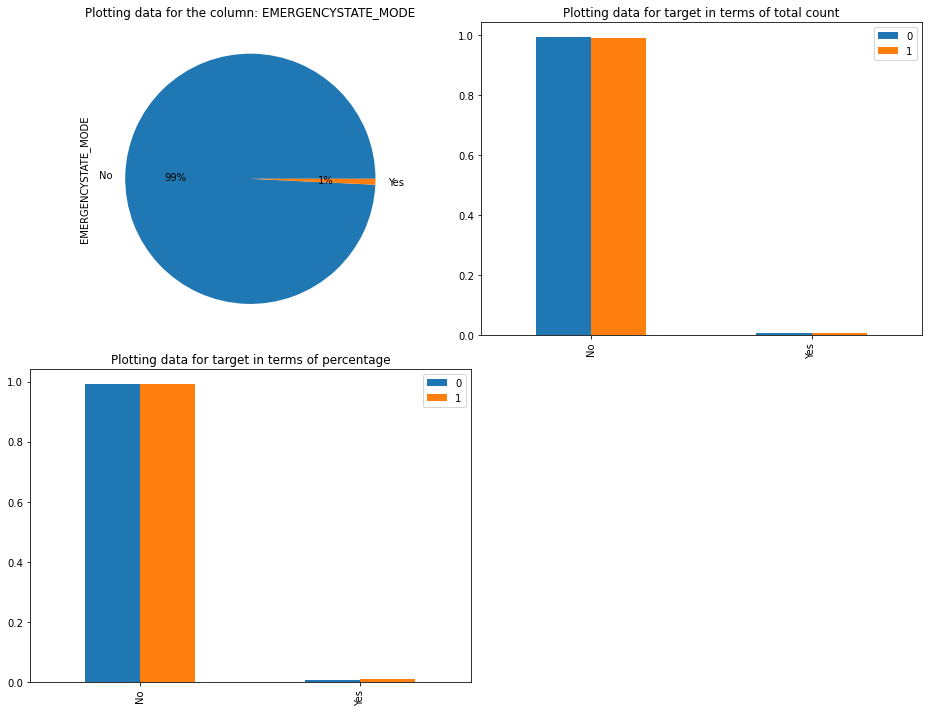

In [220]:
#univariate analysis of the categorical data
for column in data_categorical:
    print("Plotting", column)
    plotting(application_data, data_0, data_1, column)

**Insights:** 
* From NAME_CONTRACT_TYPE we can see that Cash Loans has highest percentage i.e. 90% over Revolving Loans which is 10%.
  Also, customer who has taken Cash Loan are slightly more likely to default than customer who opted for revolving loans.
* From CODE_GENDER we can see that out of total customer 66% are female and only 34% are male who opted for loan. But for  repaying the loan, males population tends to default more than the female customer.
* From FLAG_OWN_CAR we can see that from the 34% of the total population which are the customers owns who owns a car are less likely to default the loan than those who doesn't own a car.
* From FLAG_OWN_REALTY column we can see that, it is totaly opposite to the customer who own a car as there are more percentage of customer who own a realty. And there is not much difference percentage wise that customer is likely to default the loan between the customer who owns a realty and who doesn't own a realty.
* From NAME_INCOME_TYPE we can see that working class customers are more likely to default the loan followed by Commercial Associate whereas pensioner customer are less likely to default the loan. 
* From NAME_EDUCATION_TYPE we can see around 70% of the population are applying for loan for purpose of Secondary Education followed by Higher Education.
* From NAME_FAMILY_STATUS we can find that most of the customers who have applied for loan are married i.e 64% of the population and are relatively less likely to default in comparison to customer who are Singleor any other marital status.
* From NAME_HOUSING_TYPE we can see that the customer who have applied for loan are staying in House or Apartments are less likely to default in comparison to customer who has other type of housing.
* From OCCUPATION_TYPE we can see that the customer who are Labourers are more likely to default the loan followed by Driver and Sales Staffs. However, Manager has maximum capability of replaying the loan followed by Accountants. Least loans are provided or taken by Students, Businessman and who are unemployed.


## Bi-variate analysis on the numerical columns ##


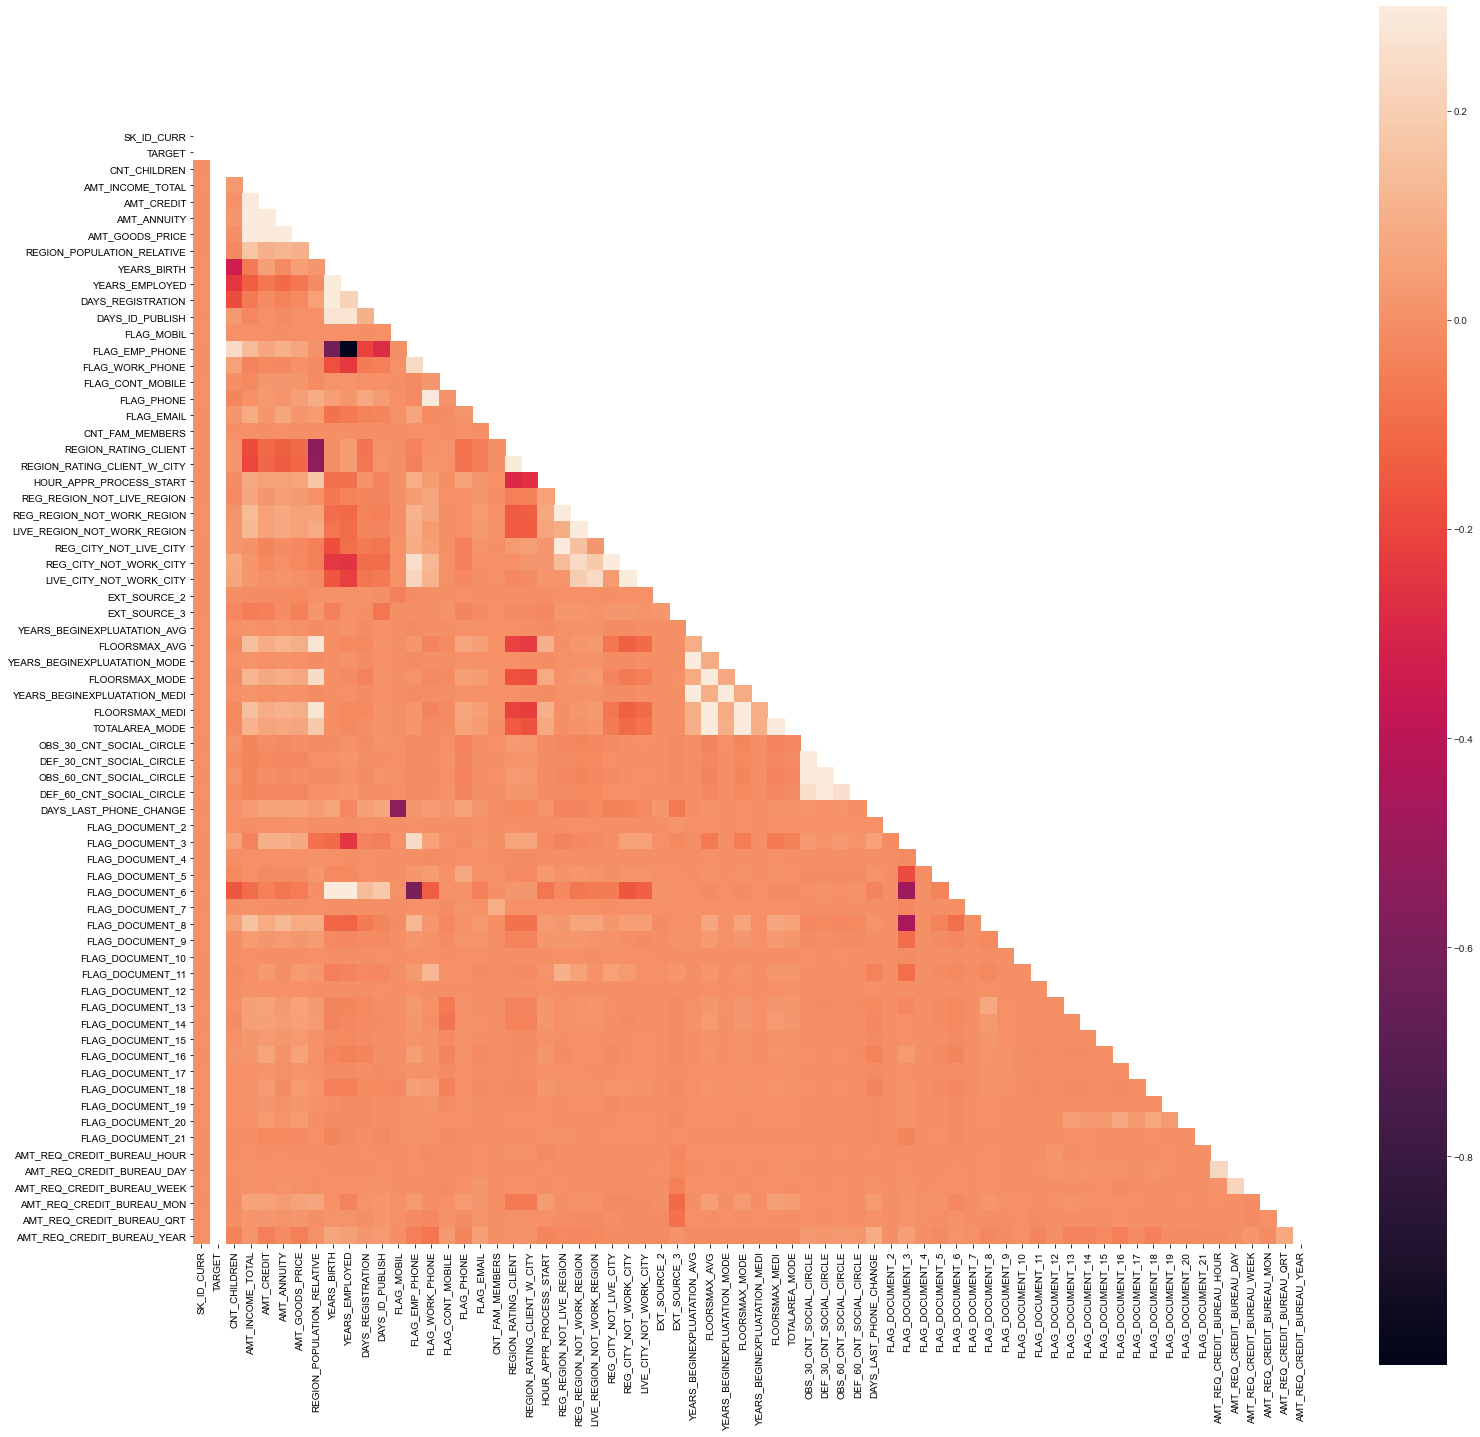

In [221]:
# Finding the correlation between the variables
# Heatmap for data_0
corr = data_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True   #automatically mask or hide
f, ax = plt.subplots(figsize = (25,25))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax = 0.3, square = True)
    plt.show()

#### Finding the top 10 correlations separate for data_0 and data_1 ####


In [222]:
# Analysing the correlatin for the data_0,i.e.applicants who had no payment difficulties
data_0.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.000716   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL                0.001739     NaN      0.027397   
AMT_CREDIT                     -0.000342     NaN      0.003081   
AMT_ANNUITY                    -0.000188     NaN      0.020361   
AMT_GOODS_PRICE                -0.000235     NaN     -0.000559   
REGION_POPULATION_RELATIVE      0.000360     NaN     -0.024363   
YEARS_BIRTH                     0.001318     NaN     -0.336907   
YEARS_EMPLOYED                  0.001742     NaN     -0.245173   
DAYS_REGISTRATION               0.001475     NaN     -0.185792   
DAYS_ID_PUBLISH                 0.000077     NaN      0.028751   
FLAG_MOBIL                      0.002925     NaN      0.001080   
FLAG_EMP_PHONE                 -0.001717     NaN      0.244274   
FLAG_WORK_PHONE                -0.000854     NaN      0.055453   
FLAG_CONT_MOBILE                0.003319     NaN     -0.001201   
FLAG_PHONE                      0.001408     NaN     -0.029929   
FLAG_EMAIL                      0.000229     NaN      0.023460   
CNT_FAM_MEMBERS                -0.001177     NaN     -0.000451   
REGION_RATING_CLIENT           -0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY    -0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START        -0.000115     NaN     -0.005244   
REG_REGION_NOT_LIVE_REGION      0.000104     NaN     -0.012342   
REG_REGION_NOT_WORK_REGION      0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION     0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY         -0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY         -0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY         0.000428     NaN      0.070988   
EXT_SOURCE_2                   -0.001613     NaN     -0.000008   
EXT_SOURCE_3                   -0.001000     NaN     -0.020247   
YEARS_BEGINEXPLUATATION_AVG     0.000866     NaN      0.004905   
FLOORSMAX_AVG                   0.002867     NaN     -0.015745   
YEARS_BEGINEXPLUATATION_MODE    0.001039     NaN      0.004397   
FLOORSMAX_MODE                  0.002676     NaN     -0.005826   
YEARS_BEGINEXPLUATATION_MEDI    0.000686     NaN      0.004552   
FLOORSMAX_MEDI                  0.002673     NaN     -0.015502   
TOTALAREA_MODE                  0.001521     NaN     -0.012591   
OBS_30_CNT_SOCIAL_CIRCLE       -0.000697     NaN      0.014532   
DEF_30_CNT_SOCIAL_CIRCLE        0.000553     NaN     -0.002193   
OBS_60_CNT_SOCIAL_CIRCLE       -0.000743     NaN      0.014199   
DEF_60_CNT_SOCIAL_CIRCLE        0.002375     NaN     -0.002125   
DAYS_LAST_PHONE_CHANGE         -0.000709     NaN      0.006627   
FLAG_DOCUMENT_2                 0.001342     NaN      0.003736   
FLAG_DOCUMENT_3                -0.003217     NaN      0.055718   
FLAG_DOCUMENT_4                -0.004321     NaN     -0.003833   
FLAG_DOCUMENT_5                -0.001426     NaN     -0.016239   
FLAG_DOCUMENT_6                 0.001972     NaN     -0.158963   
FLAG_DOCUMENT_7                -0.003047     NaN     -0.001442   
FLAG_DOCUMENT_8                 0.001618     NaN      0.053919   
FLAG_DOCUMENT_9                 0.002007     NaN     -0.002358   
FLAG_DOCUMENT_10               -0.000852     NaN     -0.002859   
FLAG_DOCUMENT_11               -0.001900     NaN     -0.005059   
FLAG_DOCUMENT_12               -0.001092     NaN      0.000322   
FLAG_DOCUMENT_13                0.001006     NaN      0.004340   
FLAG_DOCUMENT_14               -0.001236     NaN     -0.005455   
FLAG_DOCUMENT_15                0.002330     NaN      0.003710   
FLAG_DOCUMENT_16               -0.000753     NaN      0.011775   
FLAG_DOCUMENT_17                0.001776     NaN      0.001160   
FLAG_DOCUMENT_18                0.001194     NaN      0.004181   
FLAG_DOCUMENT_19                0.000676     NaN      0.001078   
FLAG

In [223]:
data_0.corr().shape

(68, 68)

In [224]:
#finding absolute values for further analysis
data_0.corr().abs()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN      0.000716   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                    0.000716     NaN      1.000000   
AMT_INCOME_TOTAL                0.001739     NaN      0.027397   
AMT_CREDIT                      0.000342     NaN      0.003081   
AMT_ANNUITY                     0.000188     NaN      0.020361   
AMT_GOODS_PRICE                 0.000235     NaN      0.000559   
REGION_POPULATION_RELATIVE      0.000360     NaN      0.024363   
YEARS_BIRTH                     0.001318     NaN      0.336907   
YEARS_EMPLOYED                  0.001742     NaN      0.245173   
DAYS_REGISTRATION               0.001475     NaN      0.185792   
DAYS_ID_PUBLISH                 0.000077     NaN      0.028751   
FLAG_MOBIL                      0.002925     NaN      0.001080   
FLAG_EMP_PHONE                  0.001717     NaN      0.244274   
FLAG_WORK_PHONE                 0.000854     NaN      0.055453   
FLAG_CONT_MOBILE                0.003319     NaN      0.001201   
FLAG_PHONE                      0.001408     NaN      0.029929   
FLAG_EMAIL                      0.000229     NaN      0.023460   
CNT_FAM_MEMBERS                 0.001177     NaN      0.000451   
REGION_RATING_CLIENT            0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY     0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START         0.000115     NaN      0.005244   
REG_REGION_NOT_LIVE_REGION      0.000104     NaN      0.012342   
REG_REGION_NOT_WORK_REGION      0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION     0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY          0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY          0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY         0.000428     NaN      0.070988   
EXT_SOURCE_2                    0.001613     NaN      0.000008   
EXT_SOURCE_3                    0.001000     NaN      0.020247   
YEARS_BEGINEXPLUATATION_AVG     0.000866     NaN      0.004905   
FLOORSMAX_AVG                   0.002867     NaN      0.015745   
YEARS_BEGINEXPLUATATION_MODE    0.001039     NaN      0.004397   
FLOORSMAX_MODE                  0.002676     NaN      0.005826   
YEARS_BEGINEXPLUATATION_MEDI    0.000686     NaN      0.004552   
FLOORSMAX_MEDI                  0.002673     NaN      0.015502   
TOTALAREA_MODE                  0.001521     NaN      0.012591   
OBS_30_CNT_SOCIAL_CIRCLE        0.000697     NaN      0.014532   
DEF_30_CNT_SOCIAL_CIRCLE        0.000553     NaN      0.002193   
OBS_60_CNT_SOCIAL_CIRCLE        0.000743     NaN      0.014199   
DEF_60_CNT_SOCIAL_CIRCLE        0.002375     NaN      0.002125   
DAYS_LAST_PHONE_CHANGE          0.000709     NaN      0.006627   
FLAG_DOCUMENT_2                 0.001342     NaN      0.003736   
FLAG_DOCUMENT_3                 0.003217     NaN      0.055718   
FLAG_DOCUMENT_4                 0.004321     NaN      0.003833   
FLAG_DOCUMENT_5                 0.001426     NaN      0.016239   
FLAG_DOCUMENT_6                 0.001972     NaN      0.158963   
FLAG_DOCUMENT_7                 0.003047     NaN      0.001442   
FLAG_DOCUMENT_8                 0.001618     NaN      0.053919   
FLAG_DOCUMENT_9                 0.002007     NaN      0.002358   
FLAG_DOCUMENT_10                0.000852     NaN      0.002859   
FLAG_DOCUMENT_11                0.001900     NaN      0.005059   
FLAG_DOCUMENT_12                0.001092     NaN      0.000322   
FLAG_DOCUMENT_13                0.001006     NaN      0.004340   
FLAG_DOCUMENT_14                0.001236     NaN      0.005455   
FLAG_DOCUMENT_15                0.002330     NaN      0.003710   
FLAG_DOCUMENT_16                0.000753     NaN      0.011775   
FLAG_DOCUMENT_17                0.001776     NaN      0.001160   
FLAG_DOCUMENT_18                0.001194     NaN      0.004181   
FLAG_DOCUMENT_19                0.000676     NaN      0.001078   
FLAG

In [225]:
# Unstacking the Corr Table
data_0.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.000716
                            AMT_INCOME_TOTAL              0.001739
                            AMT_CREDIT                    0.000342
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.003844
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.018922
                            AMT_REQ_CREDIT_BUREAU_MON     0.005082
                            AMT_REQ_CREDIT_BUREAU_QRT     0.073884
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [226]:
# Sorting the unstacked correlation table
data_0.corr().abs().unstack().sort_values(kind='quicksort')

FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
YEARS_BIRTH                 FLAG_DOCUMENT_10              4.838028e-07
FLAG_DOCUMENT_10            YEARS_BIRTH                   4.838028e-07
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_WEEK  TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_MON   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                                 NaN
Length: 4624, dtype: float64

In [227]:
#dropping columns
data_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()

FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
YEARS_BIRTH                 FLAG_DOCUMENT_10              4.838028e-07
FLAG_DOCUMENT_10            YEARS_BIRTH                   4.838028e-07
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000e+00
TOTALAREA_MODE              TOTALAREA_MODE                1.000000e+00
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 4489, dtype: float64

In [228]:
#dropping columns
correlation_0= data_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
YEARS_BIRTH                 FLAG_DOCUMENT_10              4.838028e-07
FLAG_DOCUMENT_10            YEARS_BIRTH                   4.838028e-07
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000e+00
TOTALAREA_MODE              TOTALAREA_MODE                1.000000e+00
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 4489, dtype: float64

In [229]:
# Taking columns that are less than 1.0
correlation_0= correlation_0[correlation_0!= 1.0]
correlation_0

FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
YEARS_BIRTH                 FLAG_DOCUMENT_10              4.838028e-07
FLAG_DOCUMENT_10            YEARS_BIRTH                   4.838028e-07
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
FLOORSMAX_MEDI              FLOORSMAX_AVG                 9.972533e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      9.985103e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      9.985103e-01
FLAG_EMP_PHONE              YEARS_EMPLOYED                9.997558e-01
YEARS_EMPLOYED              FLAG_EMP_PHONE                9.997558e-01
Length: 4422, dtype: float64

In [230]:
# Finding the last few columns which are highly correlated
correlation_0.tail(20)

FLOORSMAX_MODE                FLOORSMAX_AVG                   0.947370
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.947370
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.950149
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950149
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.950504
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.950504
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.962064
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.962064
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971032
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971032
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987022
AMT_GOODS_PRICE               AMT_CREDIT                      0.987022
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORS

In [231]:
# Analysing the correlatin for the data_1,i.e.applicants who had payment issues
data_1.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.005144   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.005144     NaN      1.000000   
AMT_INCOME_TOTAL               -0.010165     NaN      0.004796   
AMT_CREDIT                     -0.001290     NaN     -0.001675   
AMT_ANNUITY                    -0.007578     NaN      0.031257   
AMT_GOODS_PRICE                -0.001814     NaN     -0.008111   
REGION_POPULATION_RELATIVE      0.006301     NaN     -0.031975   
YEARS_BIRTH                     0.001160     NaN     -0.259222   
YEARS_EMPLOYED                 -0.005166     NaN     -0.192866   
DAYS_REGISTRATION              -0.006342     NaN     -0.149154   
DAYS_ID_PUBLISH                 0.002539     NaN      0.032299   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                  0.005248     NaN      0.192469   
FLAG_WORK_PHONE                 0.004970     NaN      0.051712   
FLAG_CONT_MOBILE               -0.003039     NaN      0.003592   
FLAG_PHONE                      0.018246     NaN     -0.024306   
FLAG_EMAIL                      0.000831     NaN      0.013902   
CNT_FAM_MEMBERS                -0.003816     NaN      0.885484   
REGION_RATING_CLIENT           -0.005936     NaN      0.040680   
REGION_RATING_CLIENT_W_CITY    -0.004135     NaN      0.043185   
HOUR_APPR_PROCESS_START         0.005004     NaN     -0.023899   
REG_REGION_NOT_LIVE_REGION     -0.004249     NaN     -0.024322   
REG_REGION_NOT_WORK_REGION      0.004120     NaN     -0.020793   
LIVE_REGION_NOT_WORK_REGION     0.004303     NaN     -0.012073   
REG_CITY_NOT_LIVE_CITY          0.008328     NaN     -0.001174   
REG_CITY_NOT_WORK_CITY          0.000787     NaN      0.046115   
LIVE_CITY_NOT_WORK_CITY        -0.002929     NaN      0.053515   
EXT_SOURCE_2                   -0.001634     NaN      0.004519   
EXT_SOURCE_3                    0.008330     NaN     -0.023447   
YEARS_BEGINEXPLUATATION_AVG     0.003510     NaN      0.003715   
FLOORSMAX_AVG                   0.011749     NaN     -0.021437   
YEARS_BEGINEXPLUATATION_MODE    0.004568     NaN      0.003436   
FLOORSMAX_MODE                  0.008076     NaN     -0.006126   
YEARS_BEGINEXPLUATATION_MEDI    0.003867     NaN      0.003555   
FLOORSMAX_MEDI                  0.011782     NaN     -0.021101   
TOTALAREA_MODE                  0.005621     NaN     -0.017176   
OBS_30_CNT_SOCIAL_CIRCLE       -0.009424     NaN      0.025909   
DEF_30_CNT_SOCIAL_CIRCLE       -0.005567     NaN      0.001520   
OBS_60_CNT_SOCIAL_CIRCLE       -0.009087     NaN      0.025285   
DEF_60_CNT_SOCIAL_CIRCLE       -0.009440     NaN     -0.005039   
DAYS_LAST_PHONE_CHANGE         -0.002455     NaN     -0.011547   
FLAG_DOCUMENT_2                -0.002291     NaN     -0.007779   
FLAG_DOCUMENT_3                -0.004640     NaN      0.060561   
FLAG_DOCUMENT_4                      NaN     NaN           NaN   
FLAG_DOCUMENT_5                 0.002669     NaN     -0.022138   
FLAG_DOCUMENT_6                 0.003320     NaN     -0.129482   
FLAG_DOCUMENT_7                 0.002342     NaN     -0.001895   
FLAG_DOCUMENT_8                 0.003887     NaN      0.028766   
FLAG_DOCUMENT_9                -0.005247     NaN      0.003591   
FLAG_DOCUMENT_10                     NaN     NaN           NaN   
FLAG_DOCUMENT_11               -0.003634     NaN     -0.007550   
FLAG_DOCUMENT_12                     NaN     NaN           NaN   
FLAG_DOCUMENT_13               -0.001685     NaN      0.001663   
FLAG_DOCUMENT_14                0.001327     NaN     -0.002932   
FLAG_DOCUMENT_15                0.007977     NaN      0.004800   
FLAG_DOCUMENT_16               -0.000704     NaN     -0.001079   
FLAG_DOCUMENT_17               -0.005428     NaN     -0.005500   
FLAG_DOCUMENT_18               -0.009181     NaN      0.004333   
FLAG_DOCUMENT_19               -0.006382     NaN     -0.001370   
FLAG

In [232]:
data_1.corr().shape

(68, 68)

In [233]:
#finding absolute values for further analysis
data_1.corr().abs()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN      0.005144   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                    0.005144     NaN      1.000000   
AMT_INCOME_TOTAL                0.010165     NaN      0.004796   
AMT_CREDIT                      0.001290     NaN      0.001675   
AMT_ANNUITY                     0.007578     NaN      0.031257   
AMT_GOODS_PRICE                 0.001814     NaN      0.008111   
REGION_POPULATION_RELATIVE      0.006301     NaN      0.031975   
YEARS_BIRTH                     0.001160     NaN      0.259222   
YEARS_EMPLOYED                  0.005166     NaN      0.192866   
DAYS_REGISTRATION               0.006342     NaN      0.149154   
DAYS_ID_PUBLISH                 0.002539     NaN      0.032299   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                  0.005248     NaN      0.192469   
FLAG_WORK_PHONE                 0.004970     NaN      0.051712   
FLAG_CONT_MOBILE                0.003039     NaN      0.003592   
FLAG_PHONE                      0.018246     NaN      0.024306   
FLAG_EMAIL                      0.000831     NaN      0.013902   
CNT_FAM_MEMBERS                 0.003816     NaN      0.885484   
REGION_RATING_CLIENT            0.005936     NaN      0.040680   
REGION_RATING_CLIENT_W_CITY     0.004135     NaN      0.043185   
HOUR_APPR_PROCESS_START         0.005004     NaN      0.023899   
REG_REGION_NOT_LIVE_REGION      0.004249     NaN      0.024322   
REG_REGION_NOT_WORK_REGION      0.004120     NaN      0.020793   
LIVE_REGION_NOT_WORK_REGION     0.004303     NaN      0.012073   
REG_CITY_NOT_LIVE_CITY          0.008328     NaN      0.001174   
REG_CITY_NOT_WORK_CITY          0.000787     NaN      0.046115   
LIVE_CITY_NOT_WORK_CITY         0.002929     NaN      0.053515   
EXT_SOURCE_2                    0.001634     NaN      0.004519   
EXT_SOURCE_3                    0.008330     NaN      0.023447   
YEARS_BEGINEXPLUATATION_AVG     0.003510     NaN      0.003715   
FLOORSMAX_AVG                   0.011749     NaN      0.021437   
YEARS_BEGINEXPLUATATION_MODE    0.004568     NaN      0.003436   
FLOORSMAX_MODE                  0.008076     NaN      0.006126   
YEARS_BEGINEXPLUATATION_MEDI    0.003867     NaN      0.003555   
FLOORSMAX_MEDI                  0.011782     NaN      0.021101   
TOTALAREA_MODE                  0.005621     NaN      0.017176   
OBS_30_CNT_SOCIAL_CIRCLE        0.009424     NaN      0.025909   
DEF_30_CNT_SOCIAL_CIRCLE        0.005567     NaN      0.001520   
OBS_60_CNT_SOCIAL_CIRCLE        0.009087     NaN      0.025285   
DEF_60_CNT_SOCIAL_CIRCLE        0.009440     NaN      0.005039   
DAYS_LAST_PHONE_CHANGE          0.002455     NaN      0.011547   
FLAG_DOCUMENT_2                 0.002291     NaN      0.007779   
FLAG_DOCUMENT_3                 0.004640     NaN      0.060561   
FLAG_DOCUMENT_4                      NaN     NaN           NaN   
FLAG_DOCUMENT_5                 0.002669     NaN      0.022138   
FLAG_DOCUMENT_6                 0.003320     NaN      0.129482   
FLAG_DOCUMENT_7                 0.002342     NaN      0.001895   
FLAG_DOCUMENT_8                 0.003887     NaN      0.028766   
FLAG_DOCUMENT_9                 0.005247     NaN      0.003591   
FLAG_DOCUMENT_10                     NaN     NaN           NaN   
FLAG_DOCUMENT_11                0.003634     NaN      0.007550   
FLAG_DOCUMENT_12                     NaN     NaN           NaN   
FLAG_DOCUMENT_13                0.001685     NaN      0.001663   
FLAG_DOCUMENT_14                0.001327     NaN      0.002932   
FLAG_DOCUMENT_15                0.007977     NaN      0.004800   
FLAG_DOCUMENT_16                0.000704     NaN      0.001079   
FLAG_DOCUMENT_17                0.005428     NaN      0.005500   
FLAG_DOCUMENT_18                0.009181     NaN      0.004333   
FLAG_DOCUMENT_19                0.006382     NaN      0.001370   
FLAG

In [234]:
# Unstacking the Corr Table
data_1.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.005144
                            AMT_INCOME_TOTAL              0.010165
                            AMT_CREDIT                    0.001290
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.002105
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.018755
                            AMT_REQ_CREDIT_BUREAU_MON     0.000956
                            AMT_REQ_CREDIT_BUREAU_QRT     0.104896
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [235]:
# Sorting the unstacked correlation table
data_1.corr().abs().unstack().sort_values(kind='quicksort')

FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_REQ_CREDIT_BUREAU_DAY    FLAG_DOCUMENT_16               0.000016
                                                              ...   
AMT_REQ_CREDIT_BUREAU_YEAR   TARGET                              NaN
                             FLAG_MOBIL                          NaN
                             FLAG_DOCUMENT_4                     NaN
                             FLAG_DOCUMENT_10                    NaN
                             FLAG_DOCUMENT_12                    NaN
Length: 4624, dtype: float64

In [236]:
data_1.corr().abs().unstack().sort_values(kind='quicksort').dropna()

FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION     0.000011
AMT_REQ_CREDIT_BUREAU_DAY     FLAG_DOCUMENT_16                0.000016
                                                                ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        1.000000
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE    1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
Length: 3969, dtype: float64

In [237]:
#dropping columns
correlation_1= data_1.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_1

FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION     0.000011
AMT_REQ_CREDIT_BUREAU_DAY     FLAG_DOCUMENT_16                0.000016
                                                                ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        1.000000
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE    1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
Length: 3969, dtype: float64

In [238]:
# Taking columns that are less than 1.0
correlation_1= correlation_1[correlation_1!= 1.0]
correlation_1

FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_REQ_CREDIT_BUREAU_DAY    FLAG_DOCUMENT_16               0.000016
                                                              ...   
FLOORSMAX_AVG                FLOORSMAX_MEDI                 0.997295
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998270
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998270
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999705
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999705
Length: 3906, dtype: float64

In [239]:
# Finding the last 10 columns which are highly correlated
correlation_1.tail(20)

FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.933681
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.933681
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.936907
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.936907
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978083
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978083
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980474
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980474
AMT_GOODS_PRICE               AMT_CREDIT                      0.982783
AMT_CREDIT                    AMT_GOODS_PRICE                 0.982783
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
FLOORS

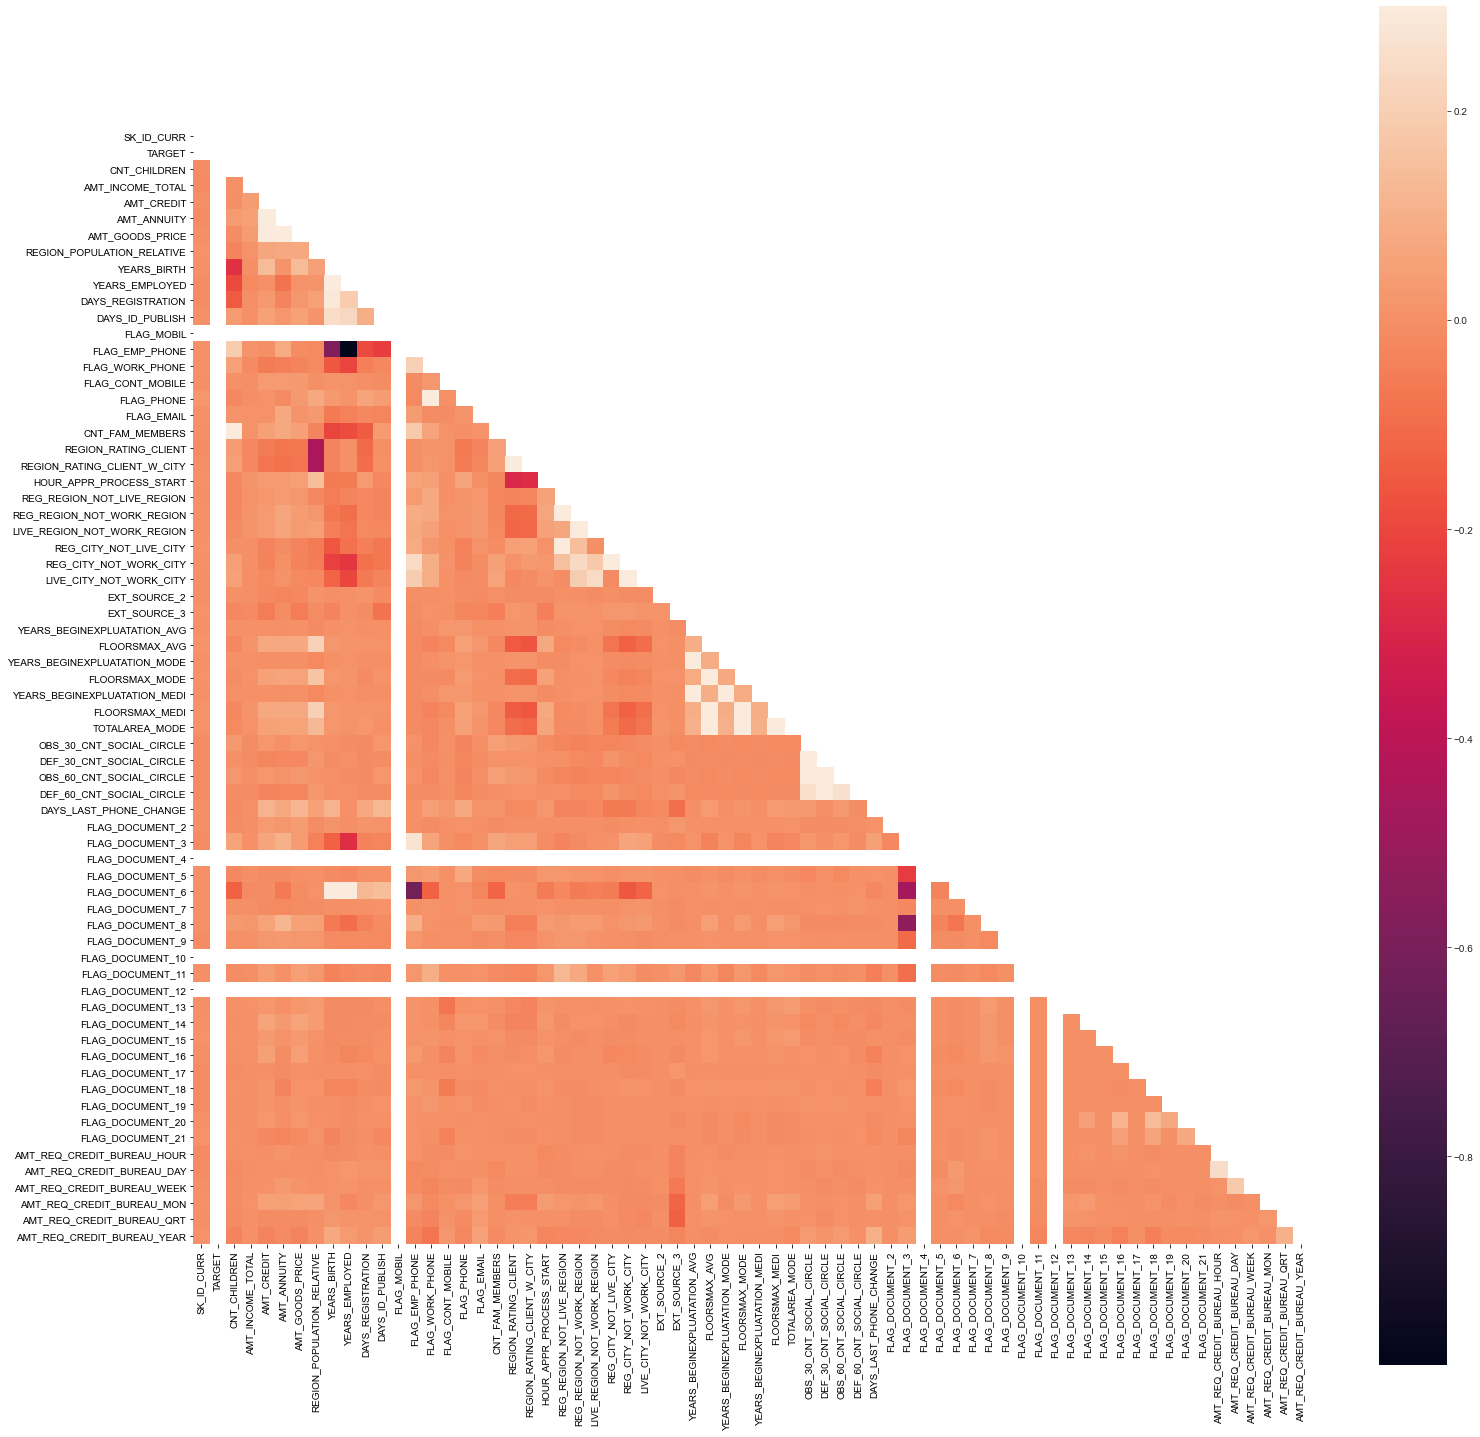

In [240]:
# Heatmap for data_1
corr = data_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True   # to mask or hide
f, ax = plt.subplots(figsize = (25,25))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax = 0.3, square = True)
    plt.show()

In [241]:
correlation_1 = data_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(20))

FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.933681
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.933681
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.936907
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.936907
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978083
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978083
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980474
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980474
AMT_GOODS_PRICE               AMT_CREDIT                      0.982783
AMT_CREDIT                    AMT_GOODS_PRICE                 0.982783
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
FLOORS

### Analysing data using box plot ###

In [242]:
data_numerical = application_data.select_dtypes(include=['int64','float64']).columns
data_numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    

In [243]:
application_data.index

RangeIndex(start=0, stop=307511, step=1)

### Analysis for the Outliers ###

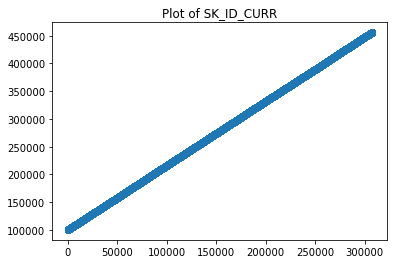

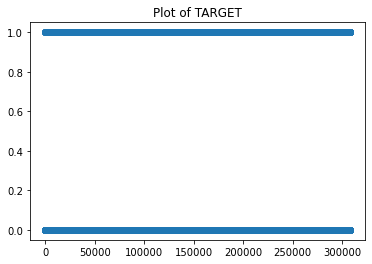

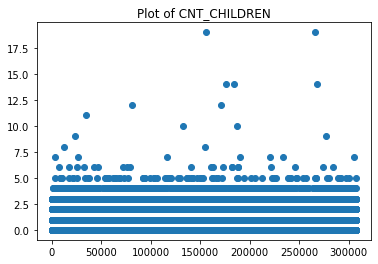

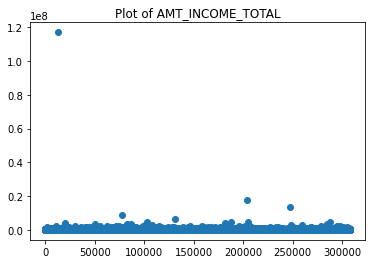

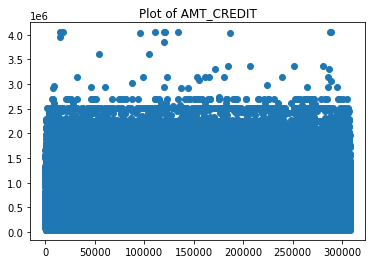

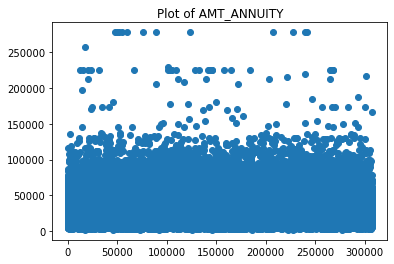

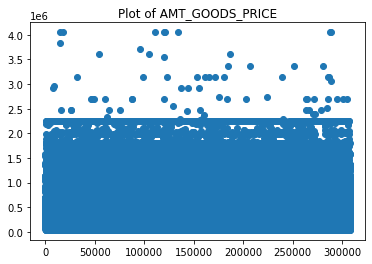

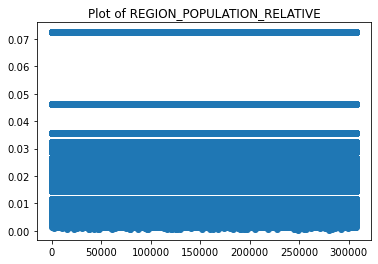

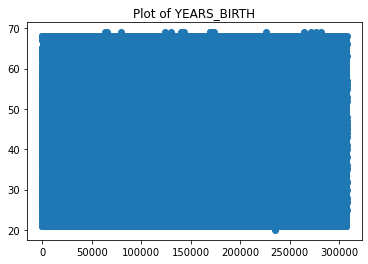

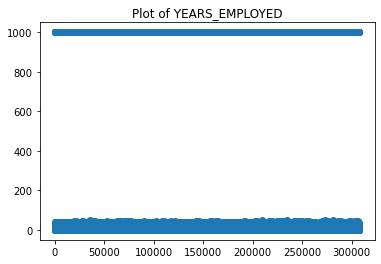

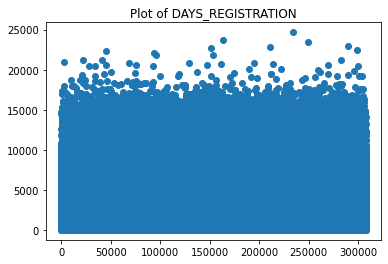

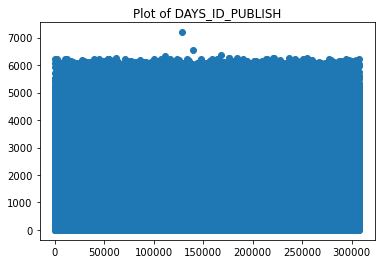

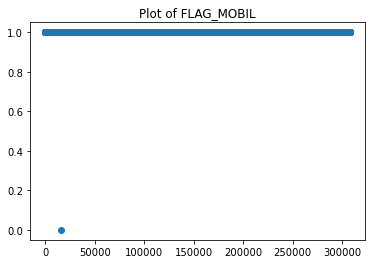

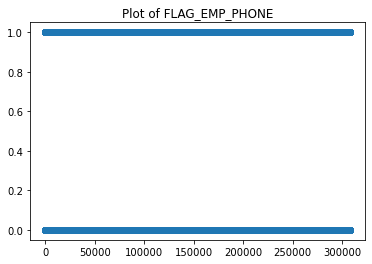

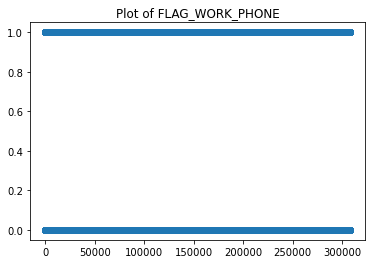

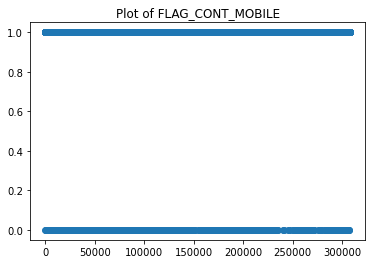

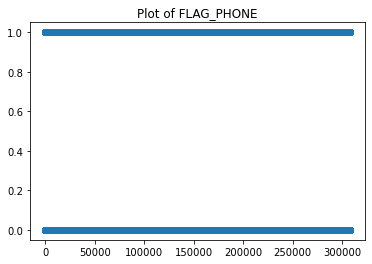

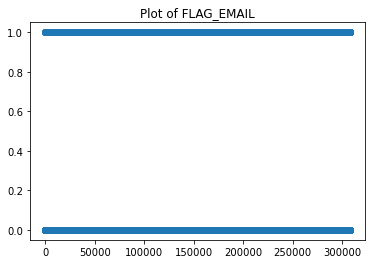

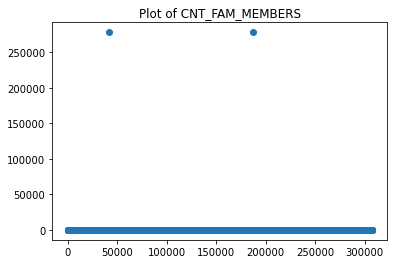

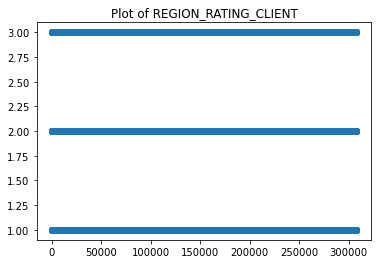

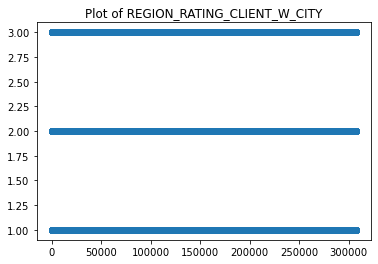

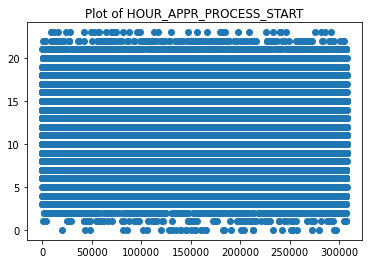

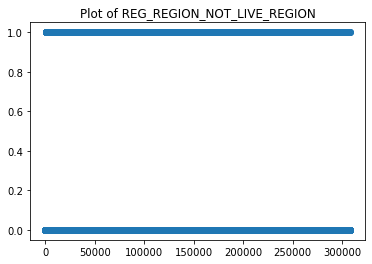

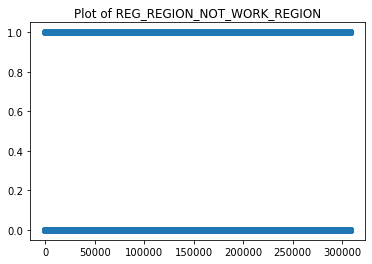

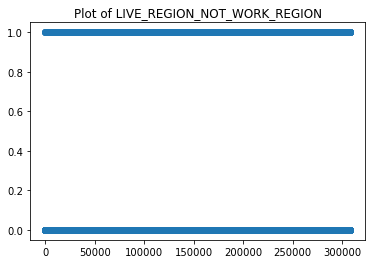

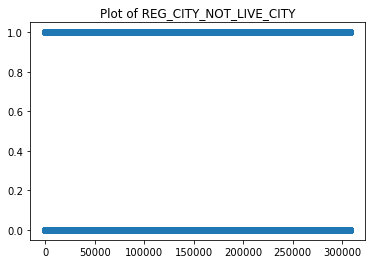

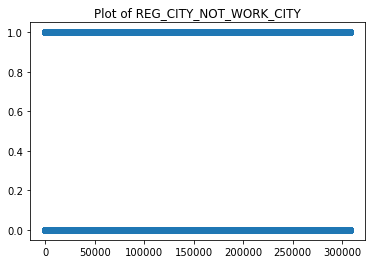

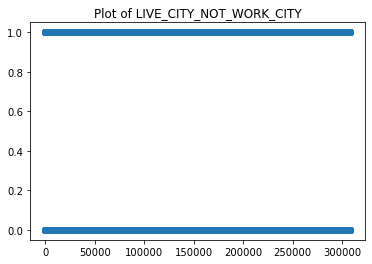

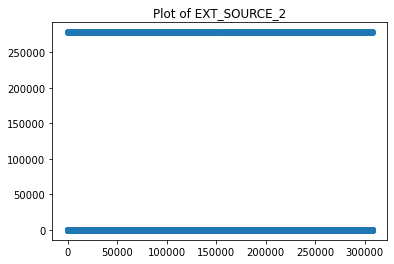

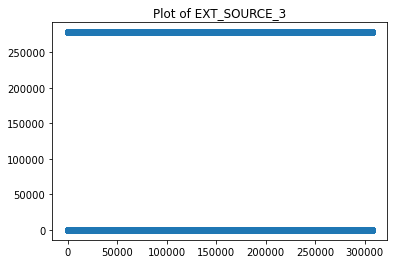

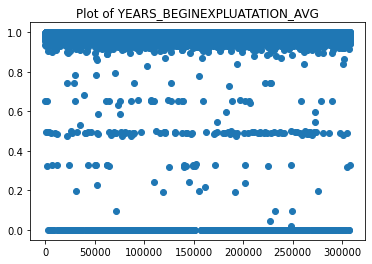

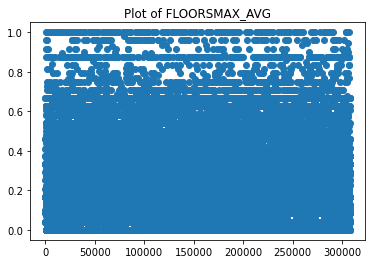

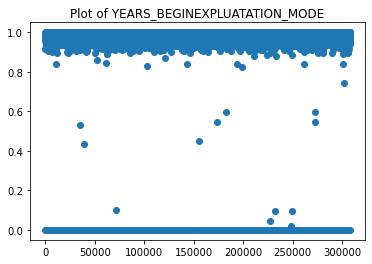

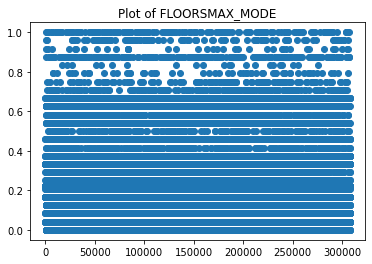

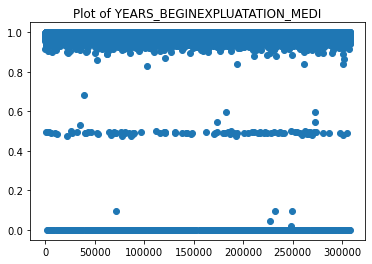

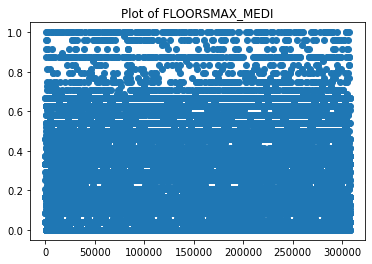

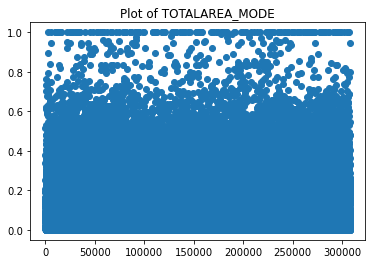

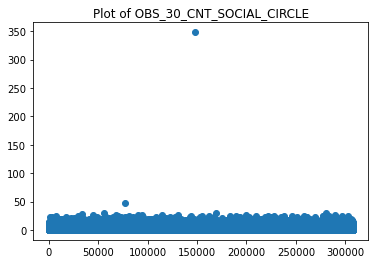

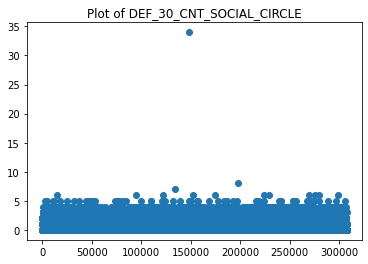

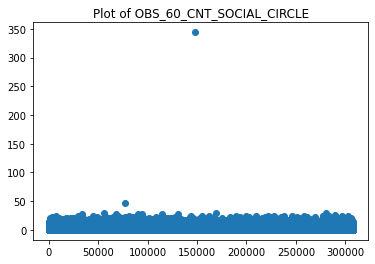

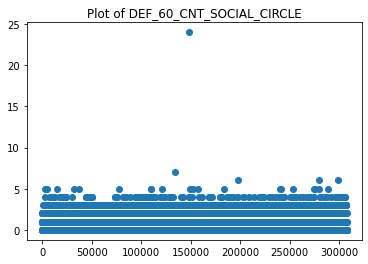

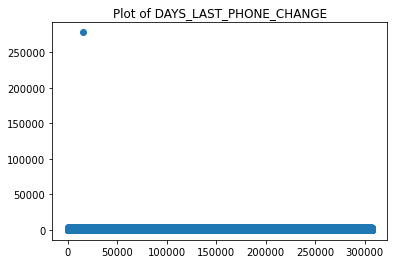

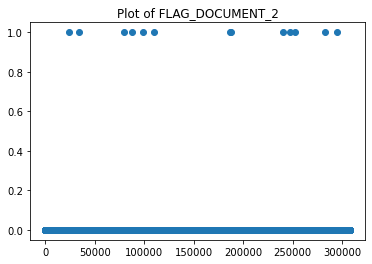

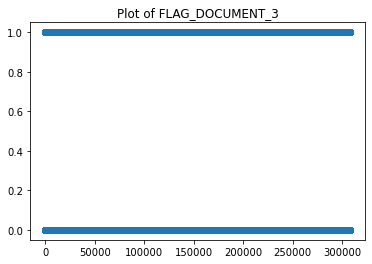

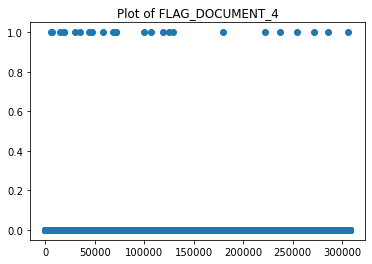

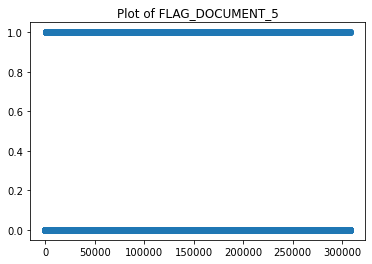

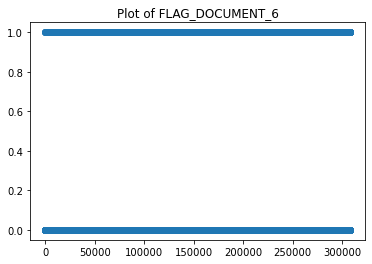

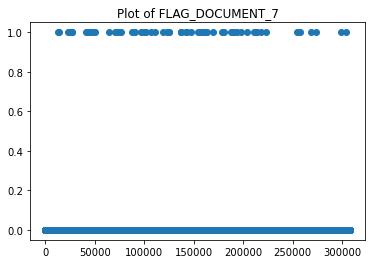

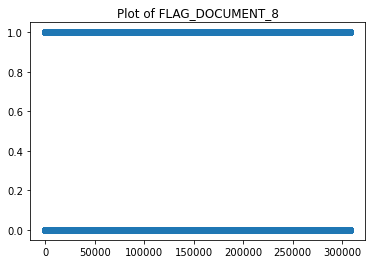

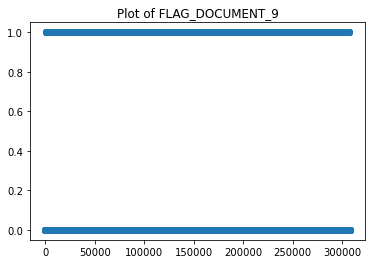

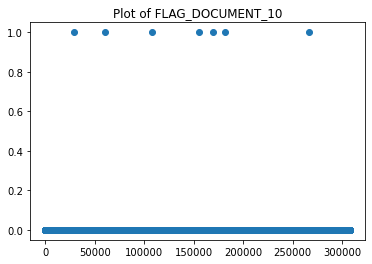

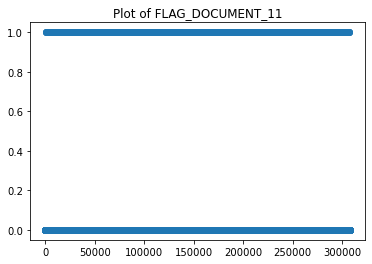

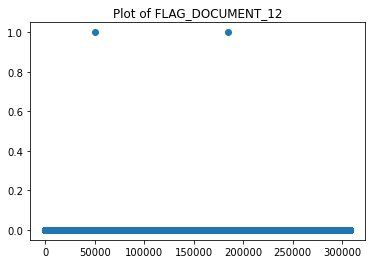

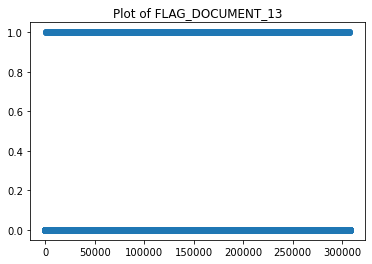

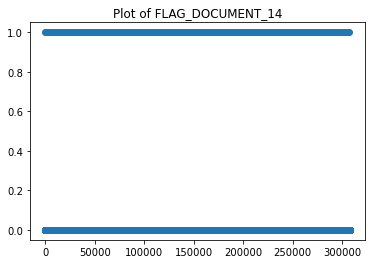

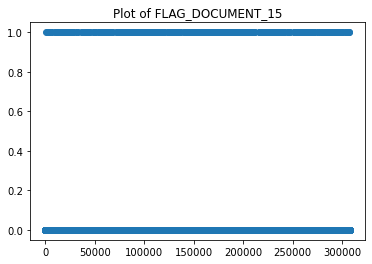

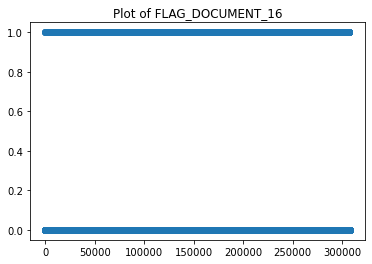

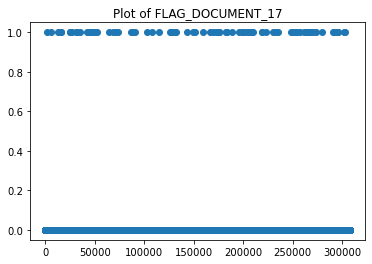

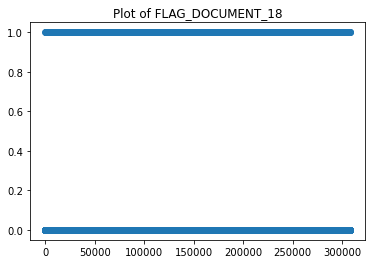

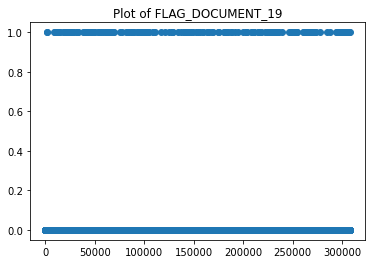

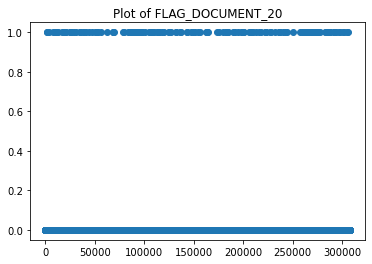

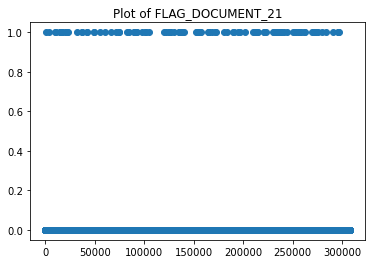

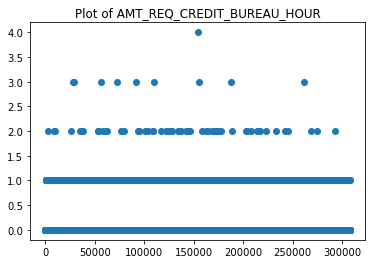

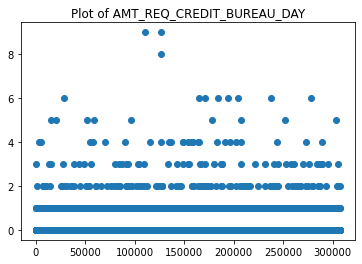

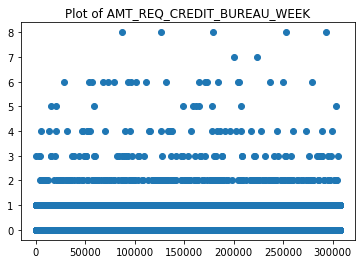

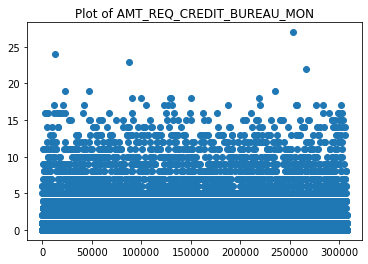

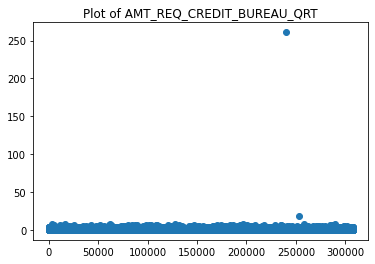

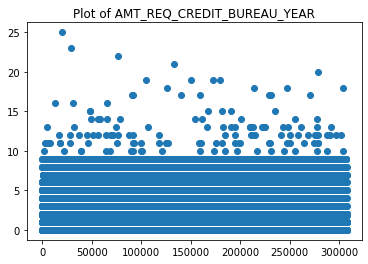

In [244]:
# finding the Outliers

for column in data_numerical:
    plt.scatter(application_data.index, application_data[column])
    plt.title("Plot of "+column)
    plt.show();

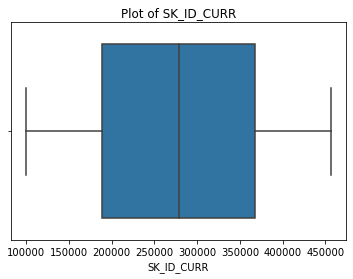

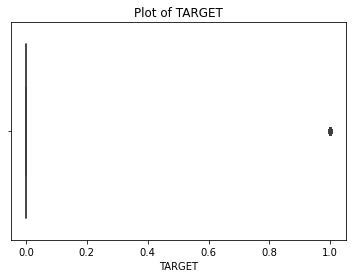

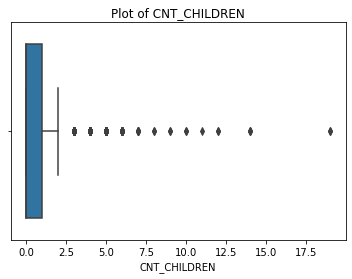

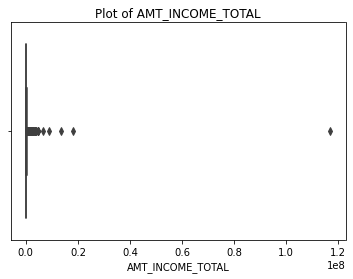

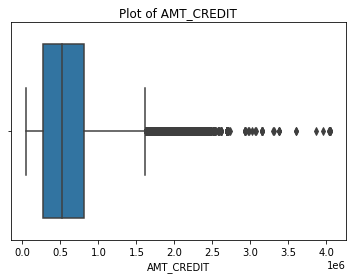

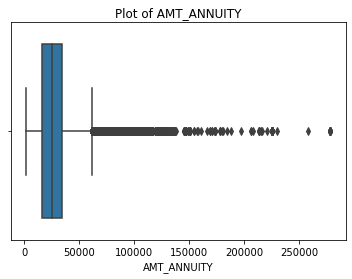

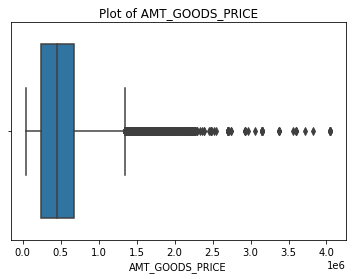

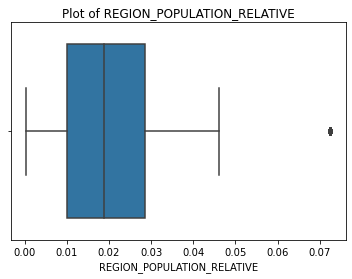

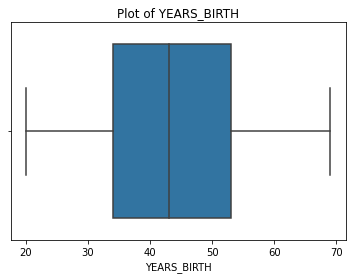

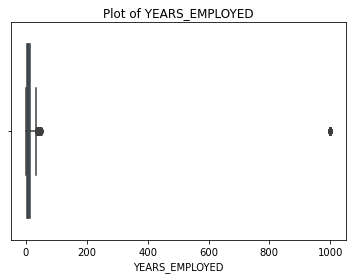

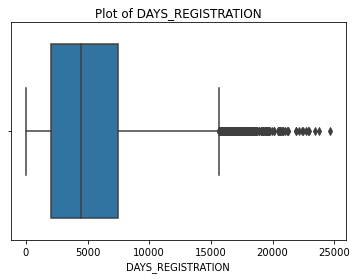

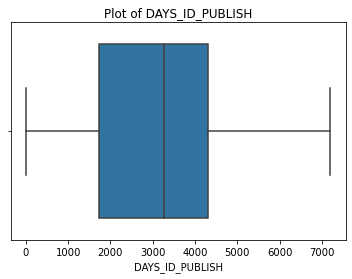

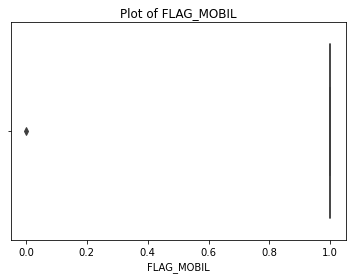

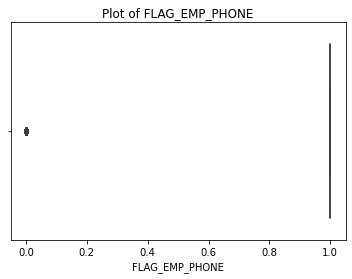

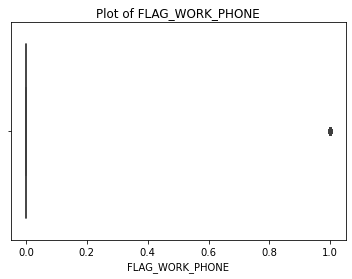

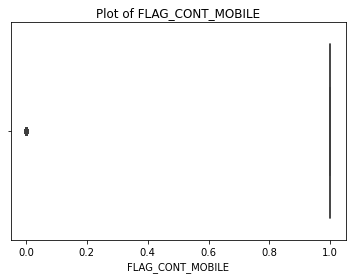

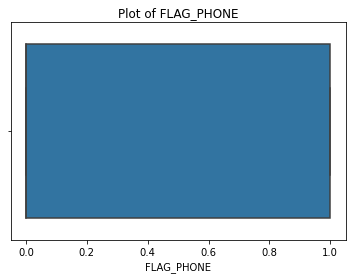

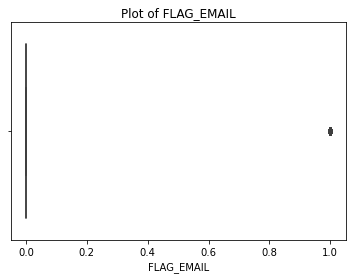

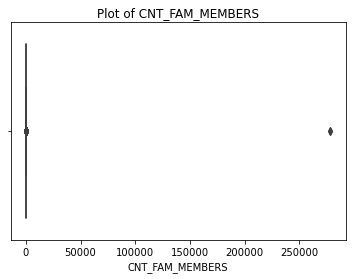

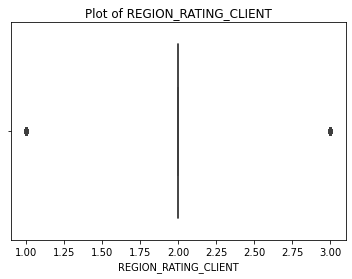

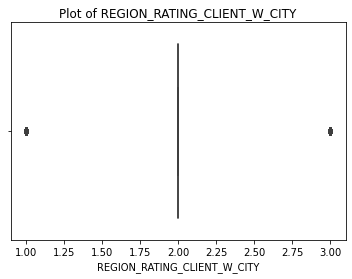

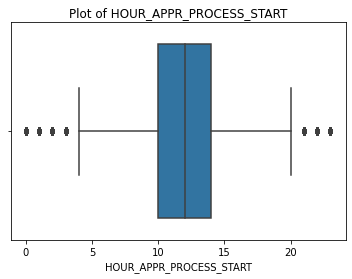

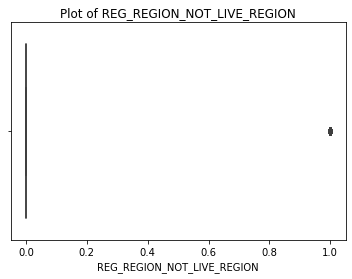

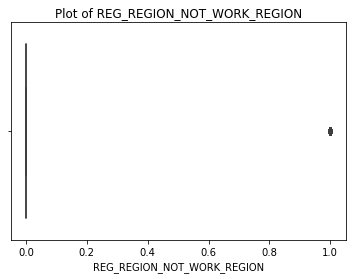

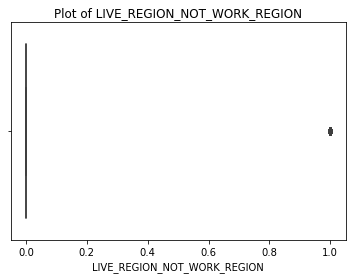

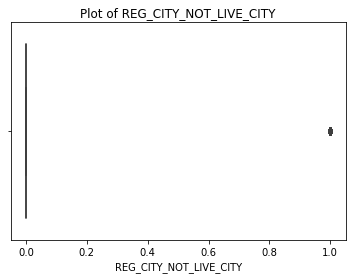

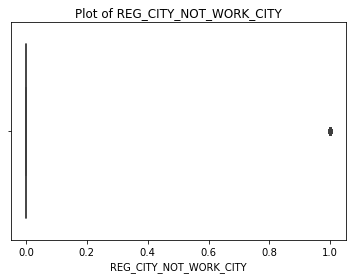

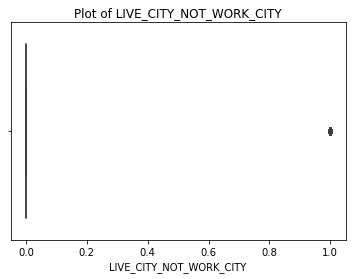

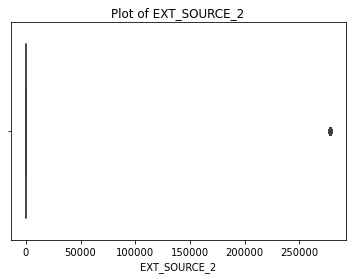

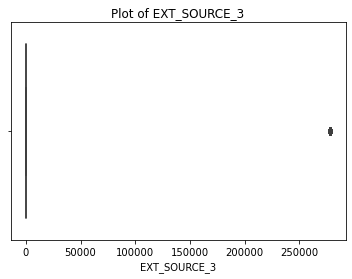

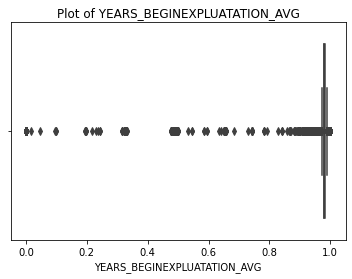

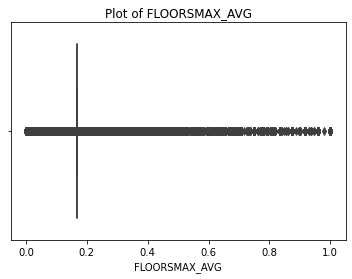

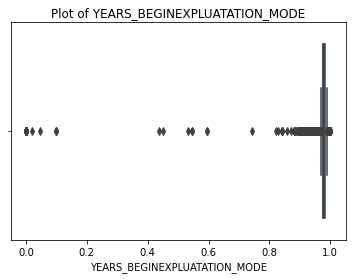

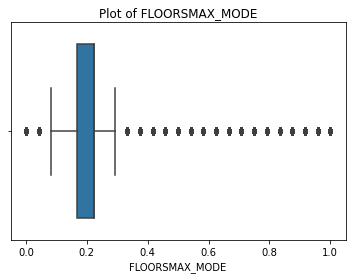

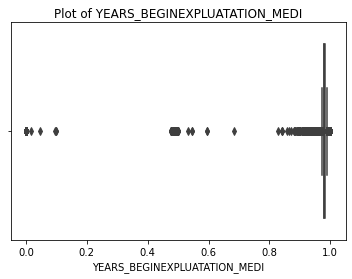

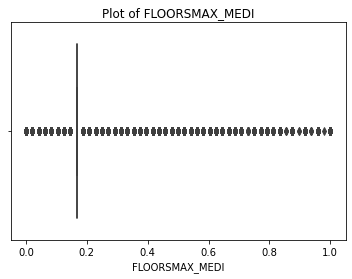

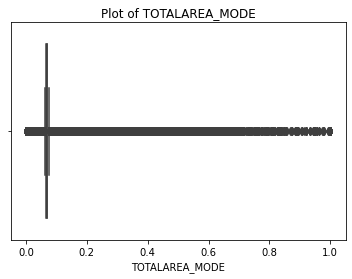

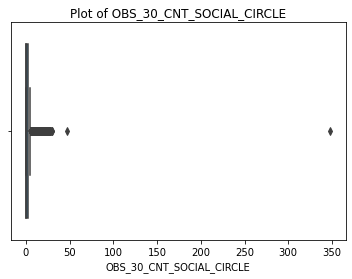

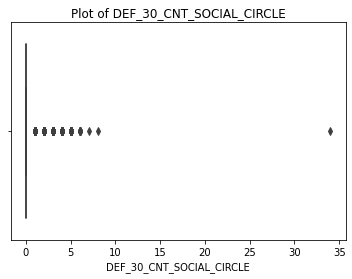

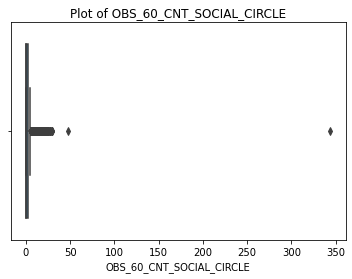

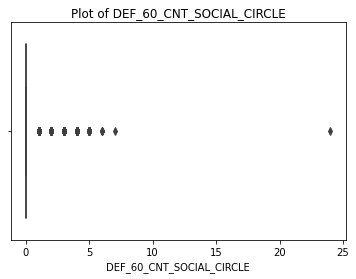

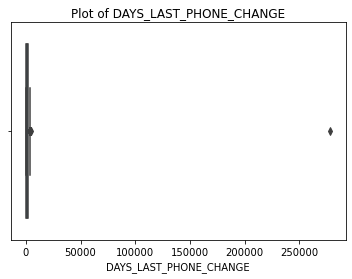

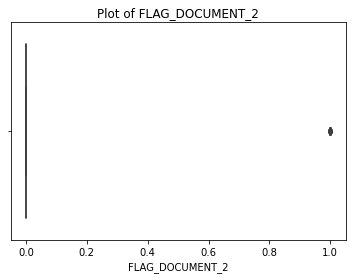

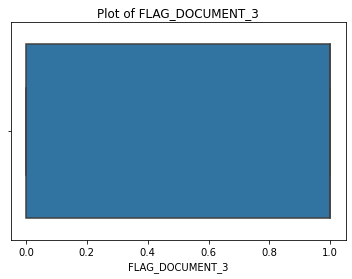

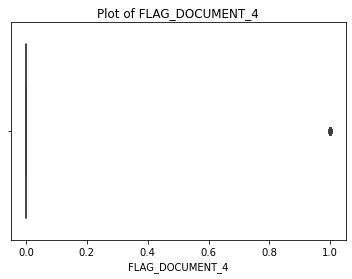

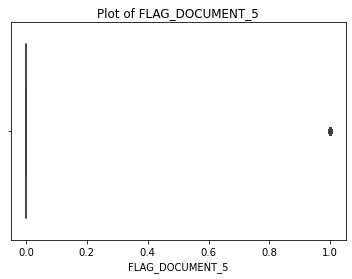

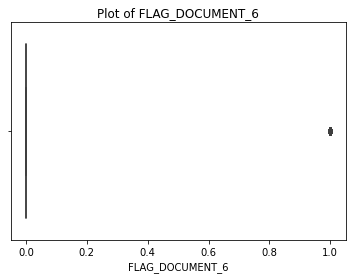

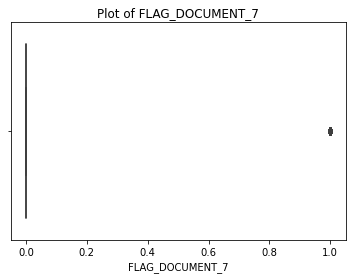

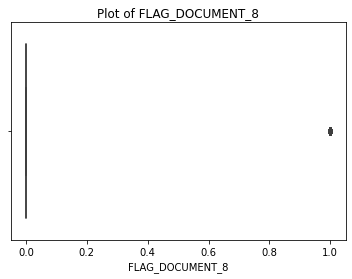

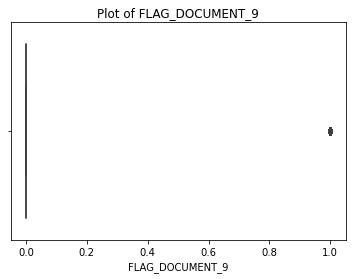

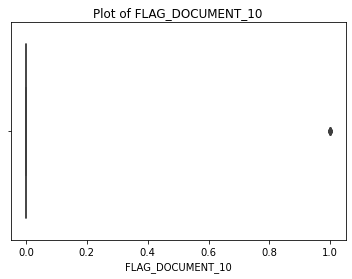

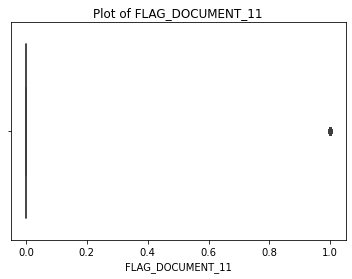

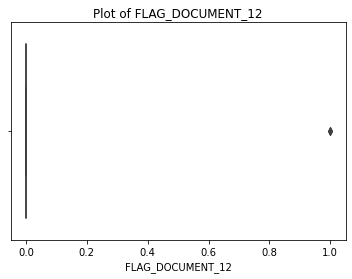

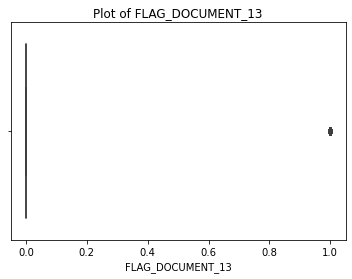

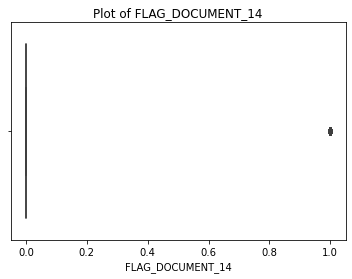

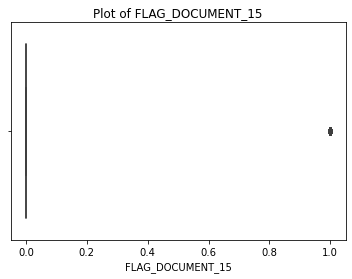

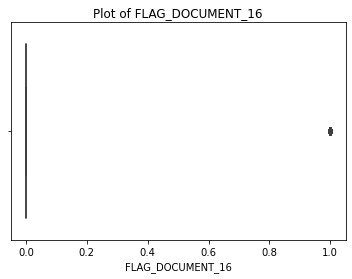

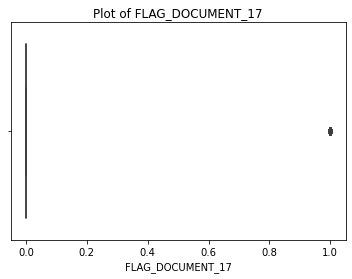

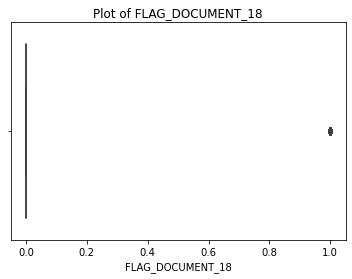

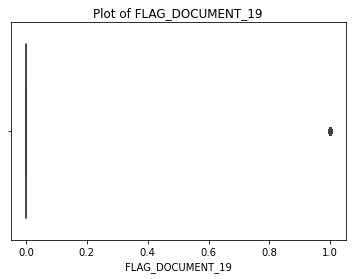

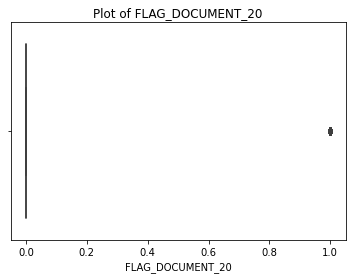

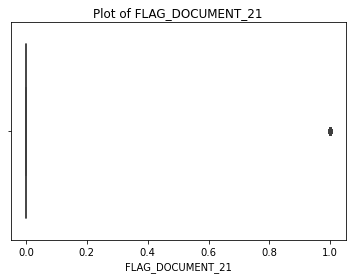

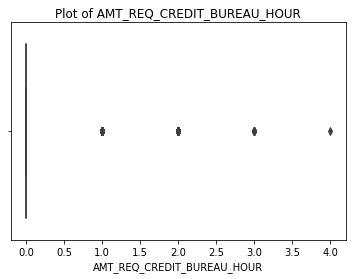

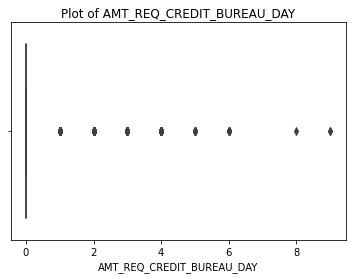

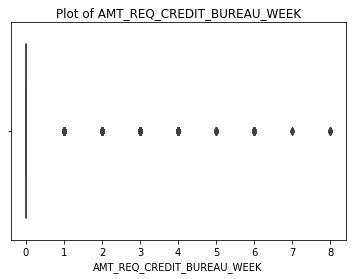

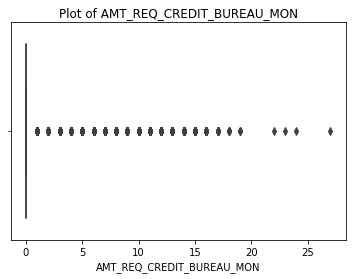

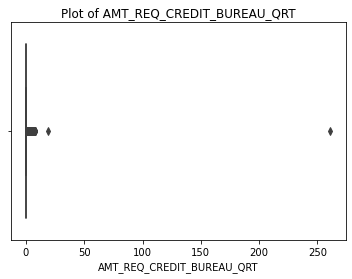

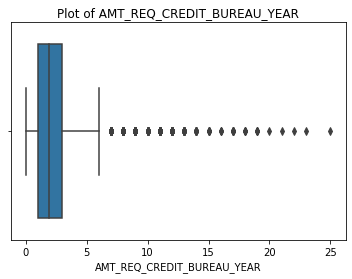

In [245]:
for column in data_numerical:
    sns.boxplot(application_data[column])
    plt.title("Plot of "+column)
    plt.show();

**Insights:** 
The analysis of the outliers is mainly based on the business problem. And if the data does not have any error, removing the extreme value will be based on the business need. By analysing the different plots, its seems that there are no error in reporting of the data. So, instead of removing those, we will just point out the columns which contain extreme values. Some of the columns that need to be analyses are:

* For CNT_CHILDREN we find some clients have more than 10 childen, which looks like an extreme value.
* AMT INCOME TOTAL-Income of the client - One value with value ~1.2  seems to be outlier as the value is significantly far away from  others and can be removed.
* From Plot of AMT_CREDIT and Plot of AMT_GOODS_PRICE we can see most of the customer has taken as loan between 0 to 2.5 mn as value of Goods is also mostly in between 0 to 2.0
* From the FLAG MOBILE column we find that there may be a case where a client does not have mobile.
* From Plot OF OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, clearly shows an outlier which can be removed.
* From Plot of AMT_REQ_CREDIT_BUREAU_YEAR, we can see that there are few customer who requested for loan approximately 10 years before which clearly seems to be an outlier and can be removed.

### Converting a numerical data to categorical for Analysis ###

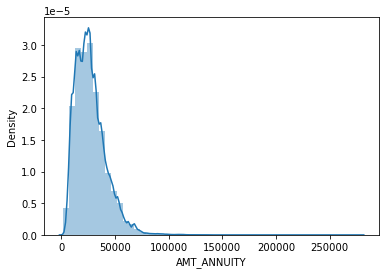

In [246]:
sns.distplot(application_data['AMT_ANNUITY'].dropna())
plt.show()

In [247]:
# defining amt_annuity function 
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

application_data['amt_annuity_categorical'] = application_data['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

<AxesSubplot:xlabel='amt_annuity_categorical', ylabel='count'>

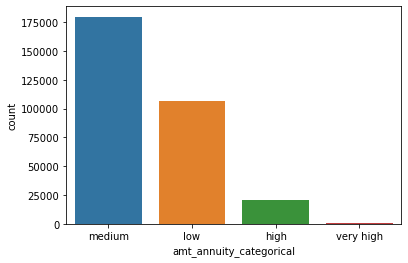

In [248]:
sns.countplot(x= 'amt_annuity_categorical', data= application_data)

### Univariate Analysis for Numerical Data ###

For Univariate Analysis of the numerical columns, we will plot the histogram and the distribution plot.

Plot of SK_ID_CURR


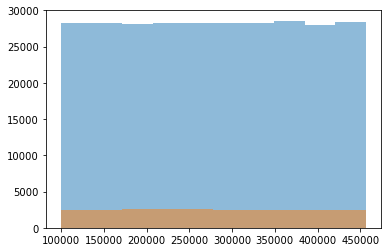

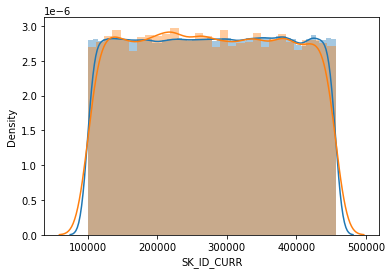

Plot of TARGET


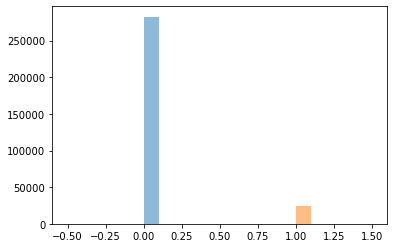

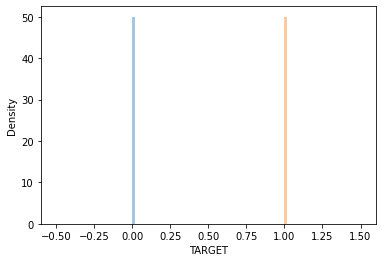

Plot of CNT_CHILDREN


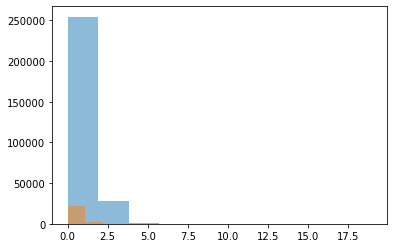

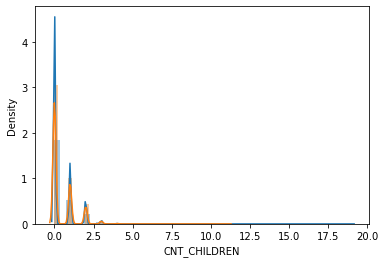

Plot of AMT_INCOME_TOTAL


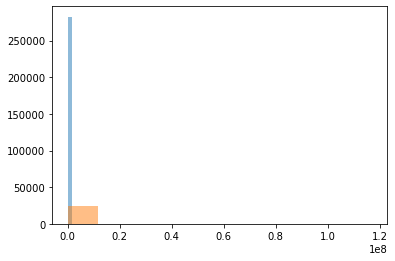

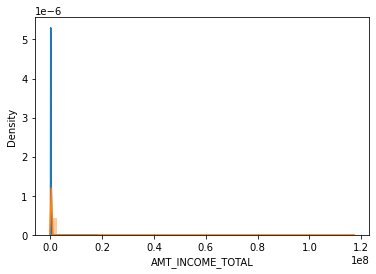

Plot of AMT_CREDIT


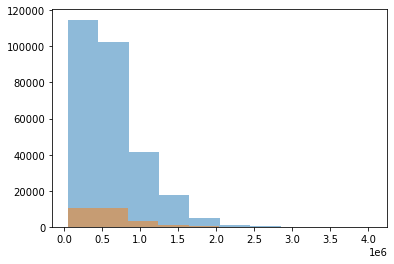

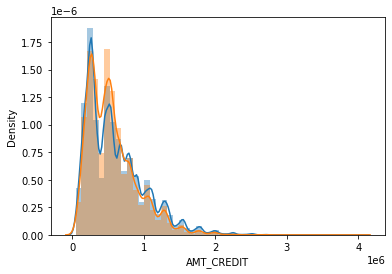

Plot of AMT_ANNUITY


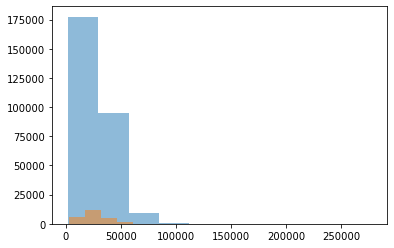

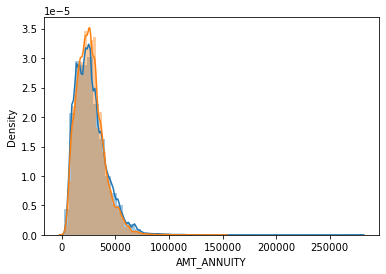

Plot of AMT_GOODS_PRICE


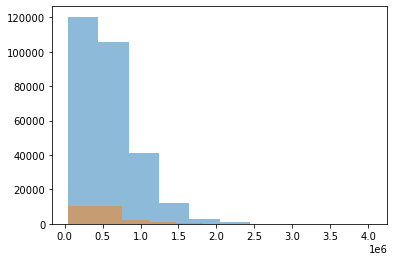

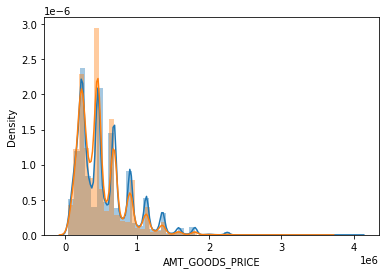

Plot of REGION_POPULATION_RELATIVE


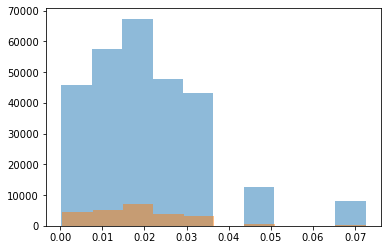

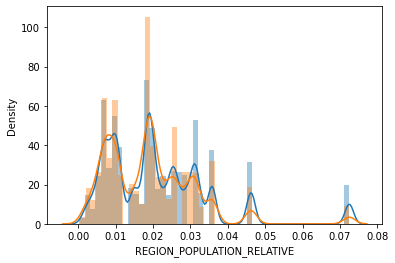

Plot of YEARS_BIRTH


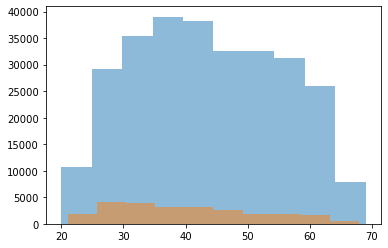

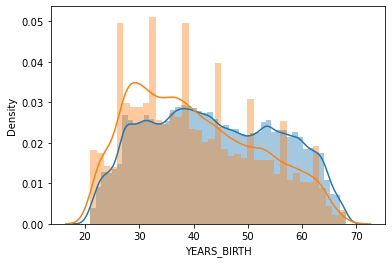

Plot of YEARS_EMPLOYED


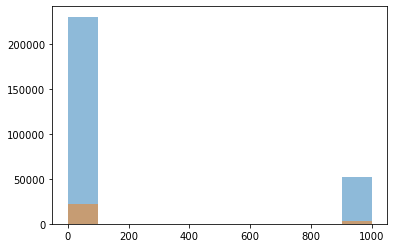

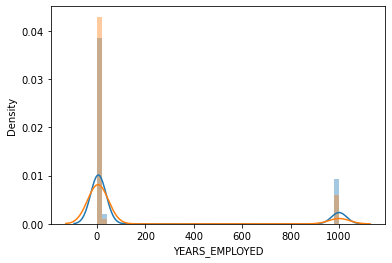

Plot of DAYS_REGISTRATION


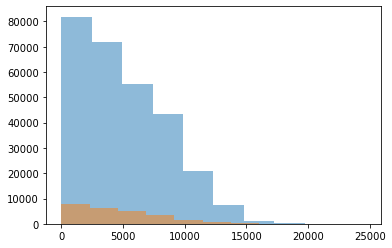

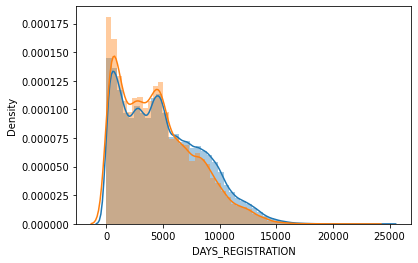

Plot of DAYS_ID_PUBLISH


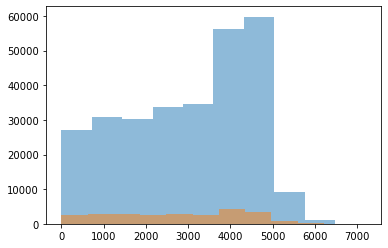

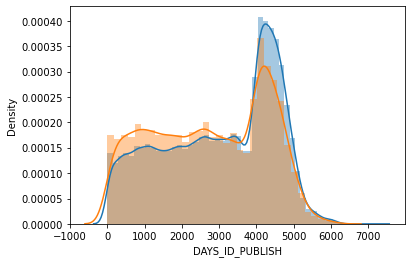

Plot of FLAG_MOBIL


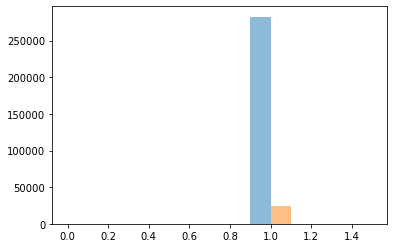

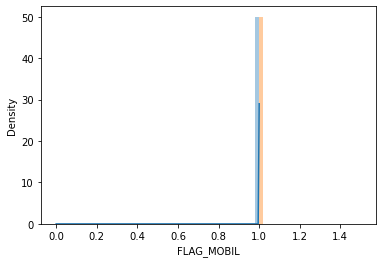

Plot of FLAG_EMP_PHONE


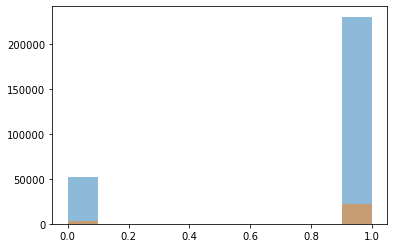

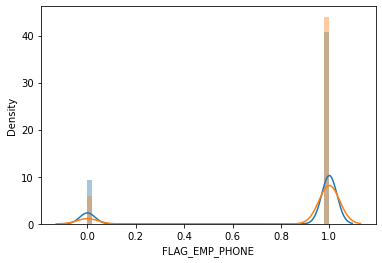

Plot of FLAG_WORK_PHONE


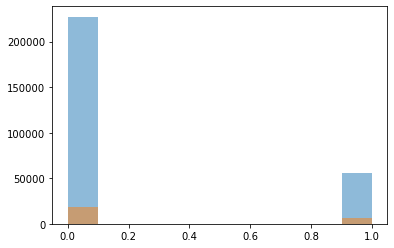

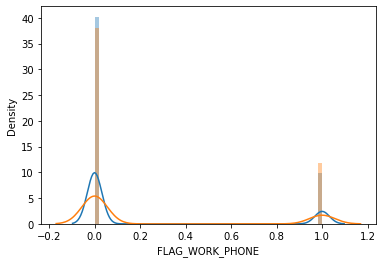

Plot of FLAG_CONT_MOBILE


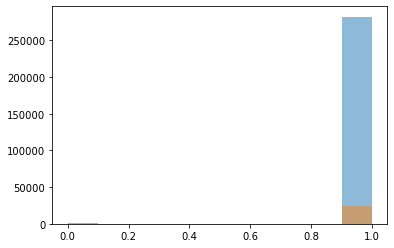

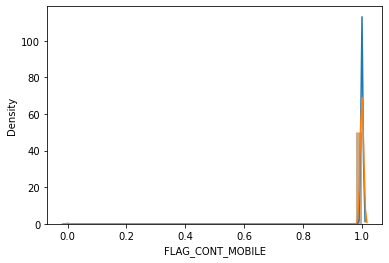

Plot of FLAG_PHONE


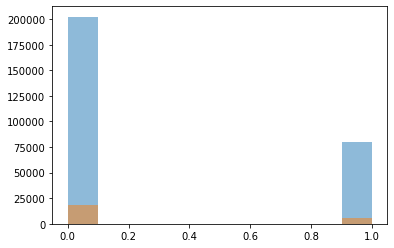

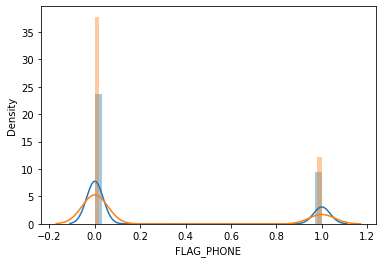

Plot of FLAG_EMAIL


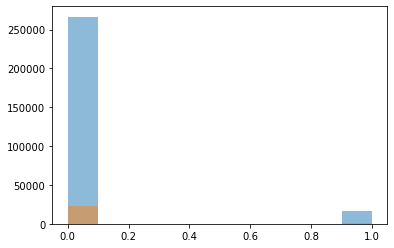

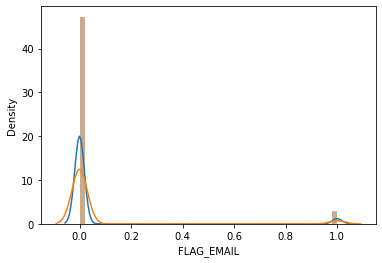

Plot of CNT_FAM_MEMBERS


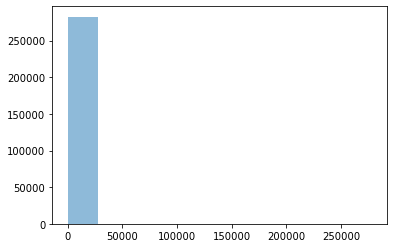

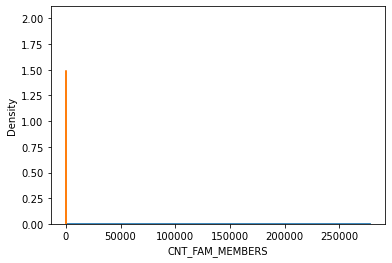

Plot of REGION_RATING_CLIENT


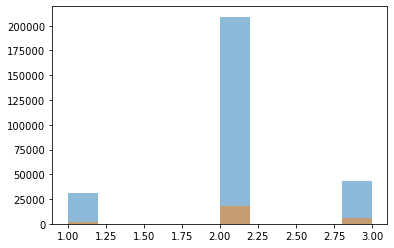

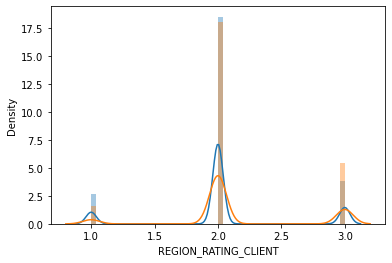

Plot of REGION_RATING_CLIENT_W_CITY


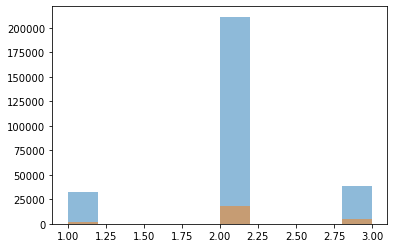

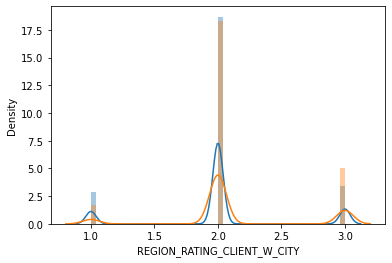

Plot of HOUR_APPR_PROCESS_START


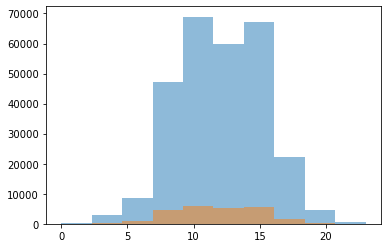

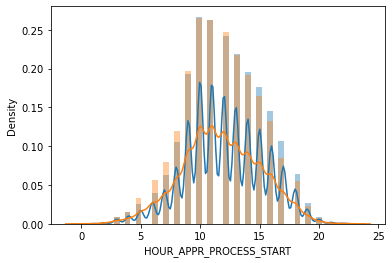

Plot of REG_REGION_NOT_LIVE_REGION


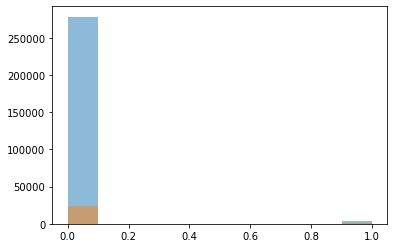

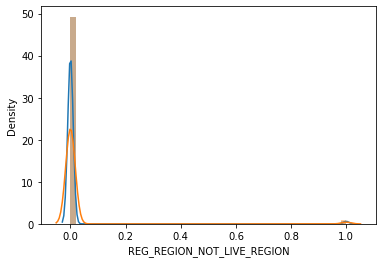

Plot of REG_REGION_NOT_WORK_REGION


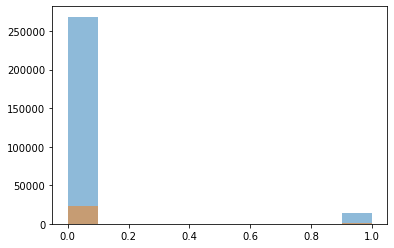

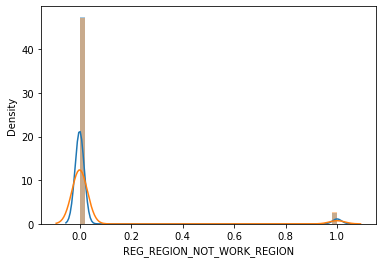

Plot of LIVE_REGION_NOT_WORK_REGION


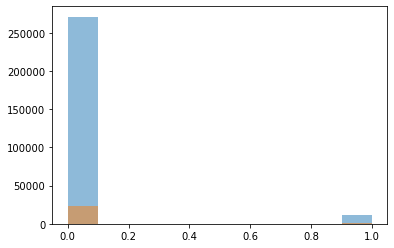

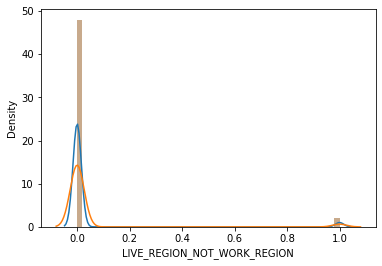

Plot of REG_CITY_NOT_LIVE_CITY


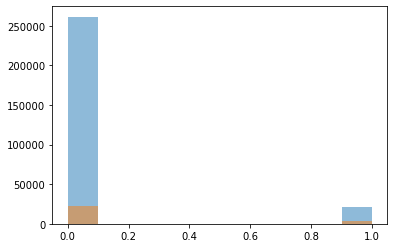

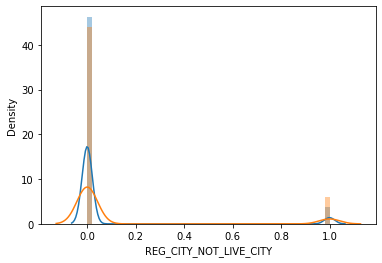

Plot of REG_CITY_NOT_WORK_CITY


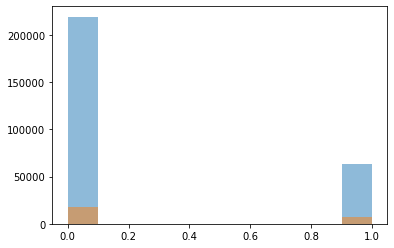

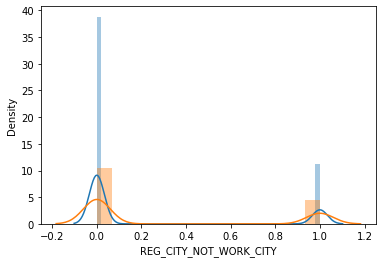

Plot of LIVE_CITY_NOT_WORK_CITY


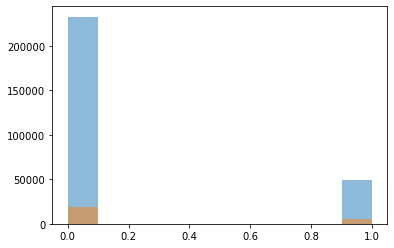

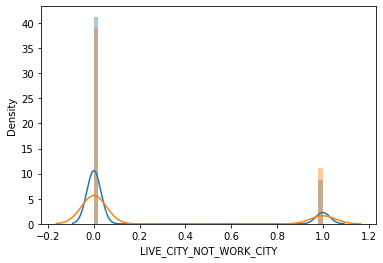

Plot of EXT_SOURCE_2


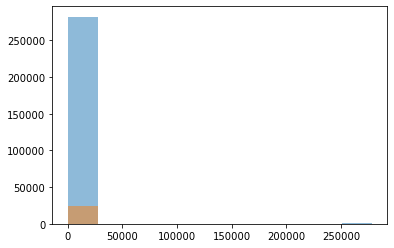

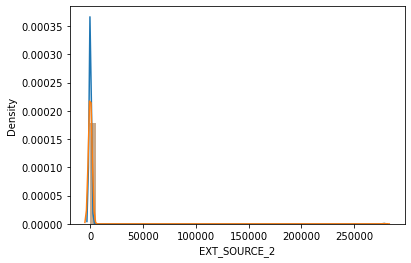

Plot of EXT_SOURCE_3


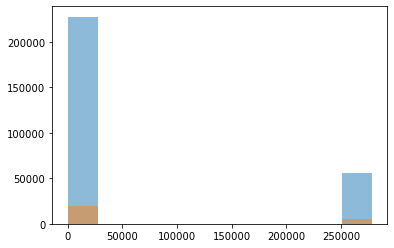

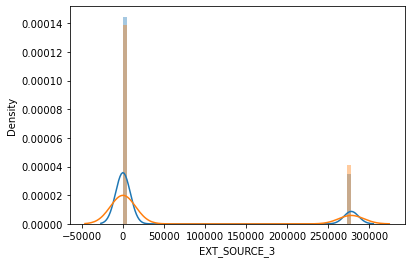

Plot of YEARS_BEGINEXPLUATATION_AVG


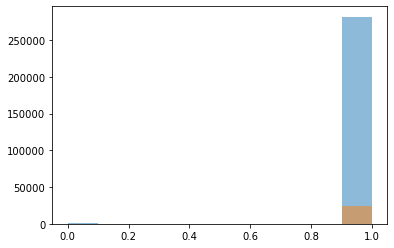

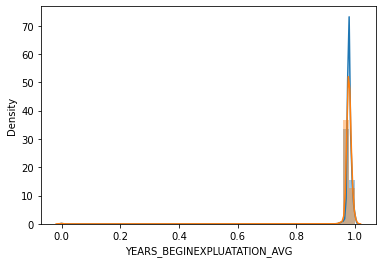

Plot of FLOORSMAX_AVG


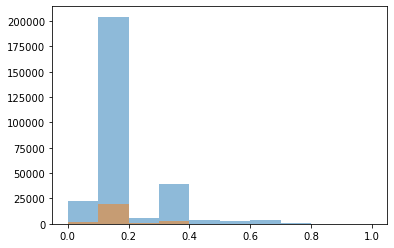

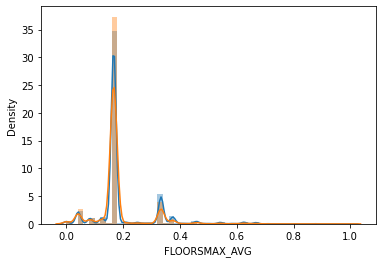

Plot of YEARS_BEGINEXPLUATATION_MODE


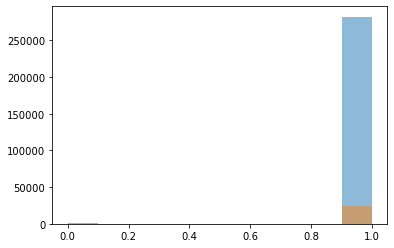

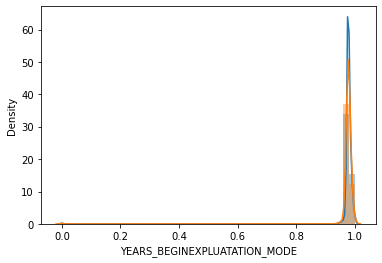

Plot of FLOORSMAX_MODE


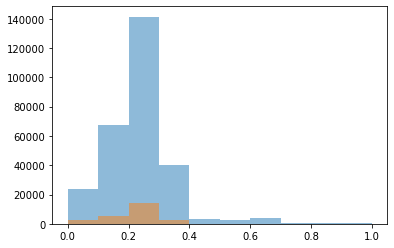

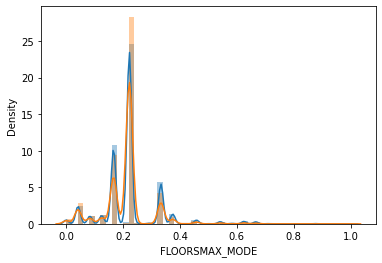

Plot of YEARS_BEGINEXPLUATATION_MEDI


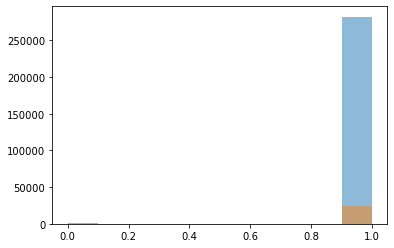

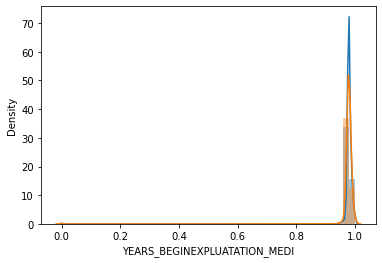

Plot of FLOORSMAX_MEDI


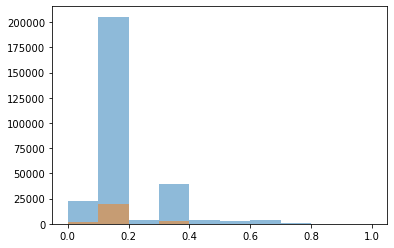

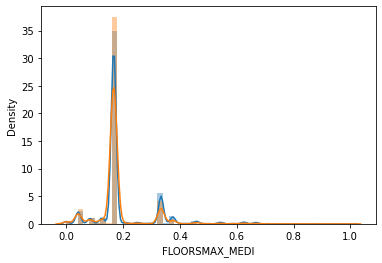

Plot of TOTALAREA_MODE


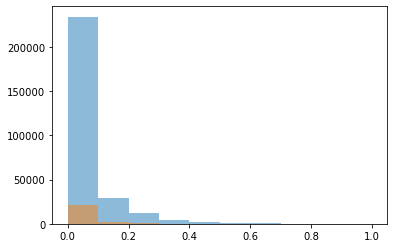

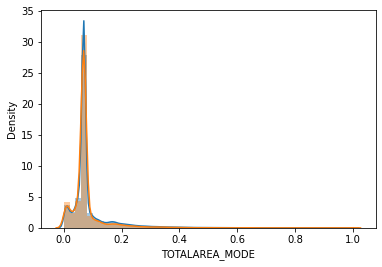

Plot of OBS_30_CNT_SOCIAL_CIRCLE


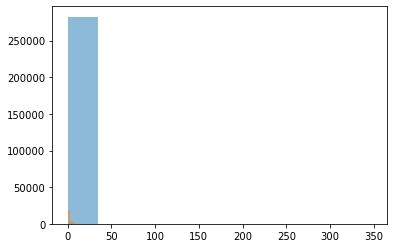

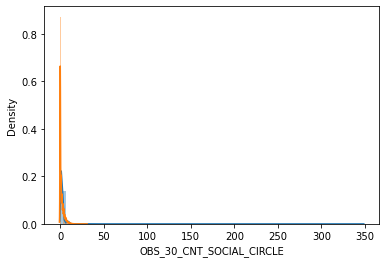

Plot of DEF_30_CNT_SOCIAL_CIRCLE


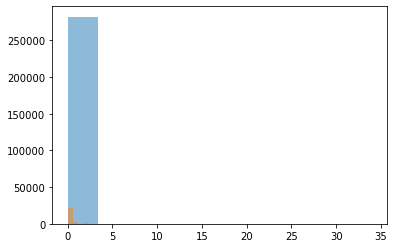

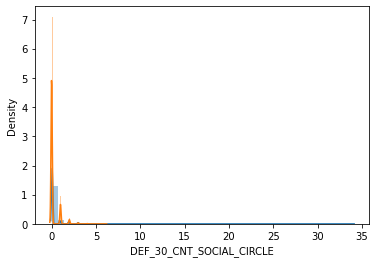

Plot of OBS_60_CNT_SOCIAL_CIRCLE


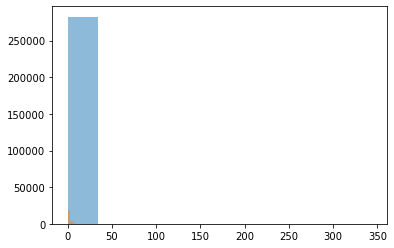

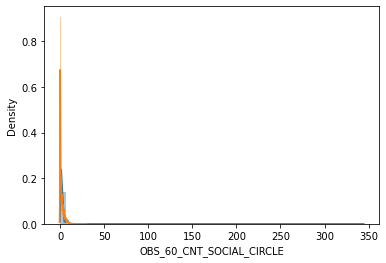

Plot of DEF_60_CNT_SOCIAL_CIRCLE


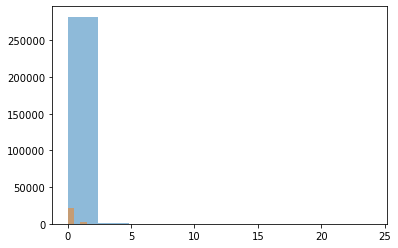

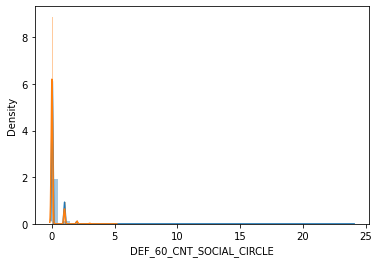

Plot of DAYS_LAST_PHONE_CHANGE


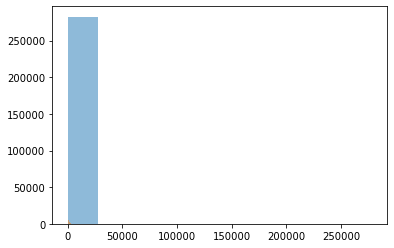

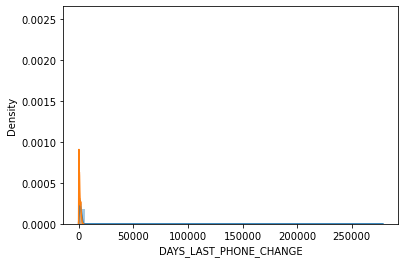

Plot of FLAG_DOCUMENT_2


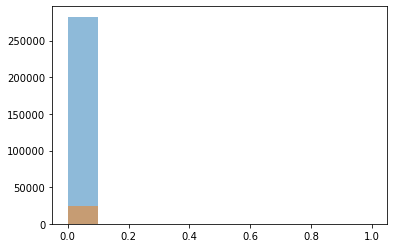

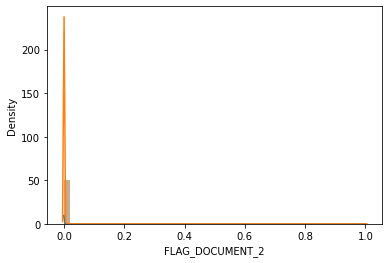

Plot of FLAG_DOCUMENT_3


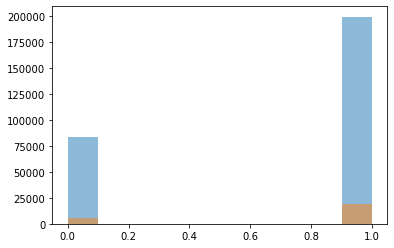

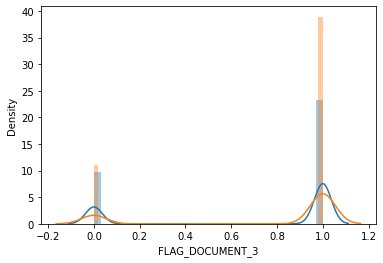

Plot of FLAG_DOCUMENT_4


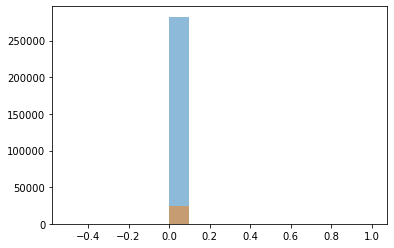

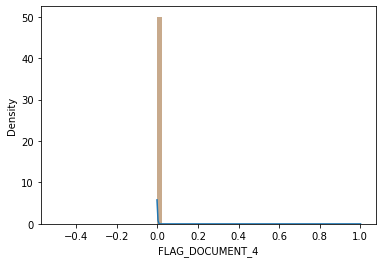

Plot of FLAG_DOCUMENT_5


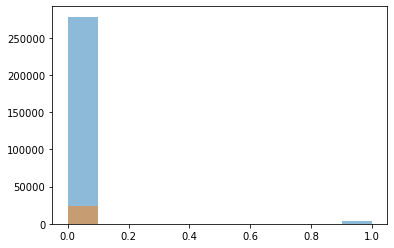

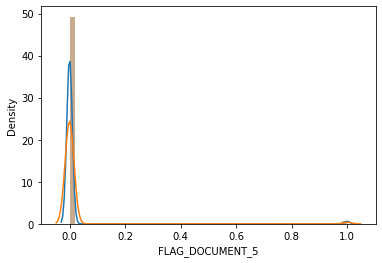

Plot of FLAG_DOCUMENT_6


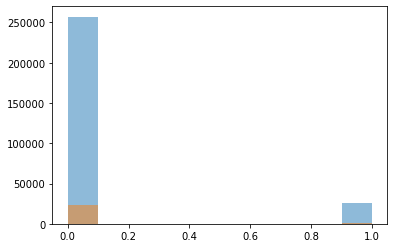

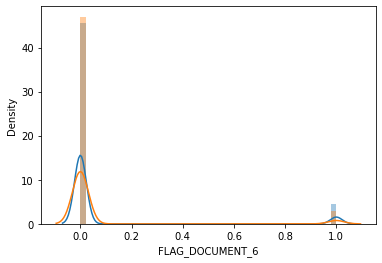

Plot of FLAG_DOCUMENT_7


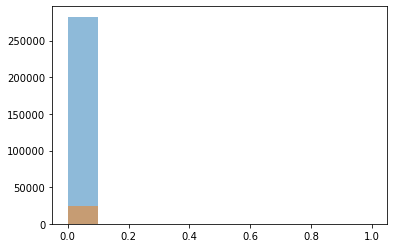

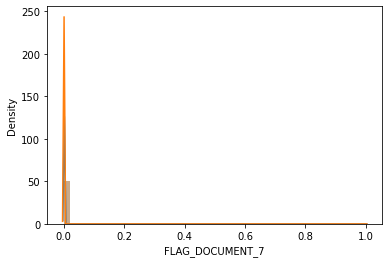

Plot of FLAG_DOCUMENT_8


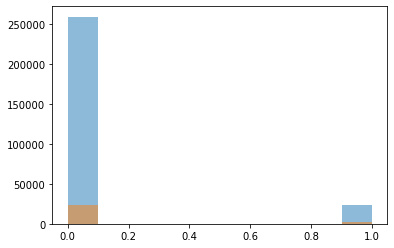

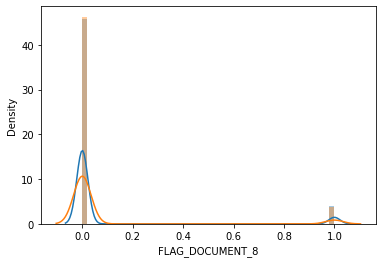

Plot of FLAG_DOCUMENT_9


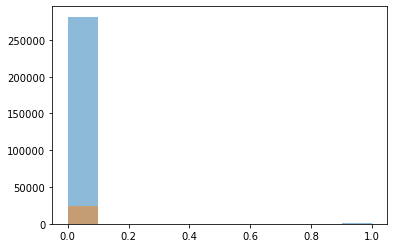

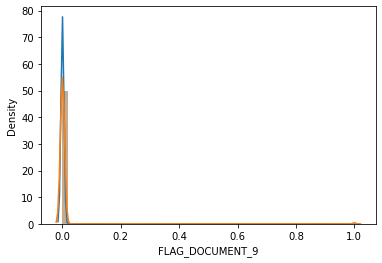

Plot of FLAG_DOCUMENT_10


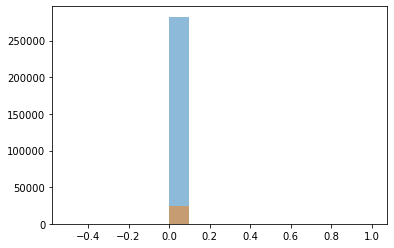

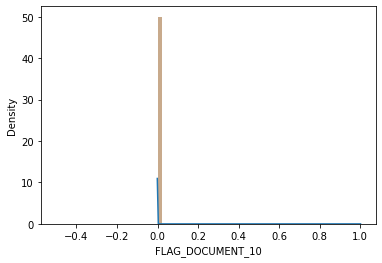

Plot of FLAG_DOCUMENT_11


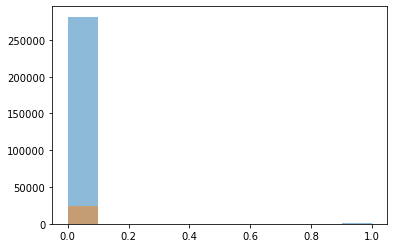

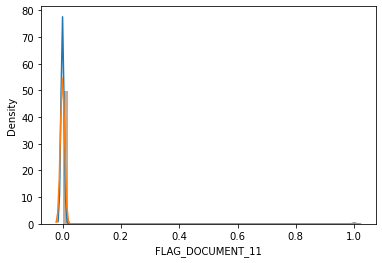

Plot of FLAG_DOCUMENT_12


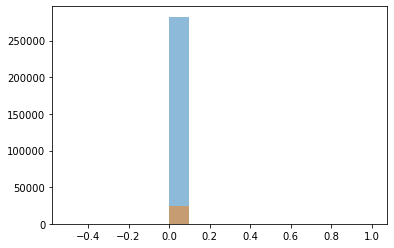

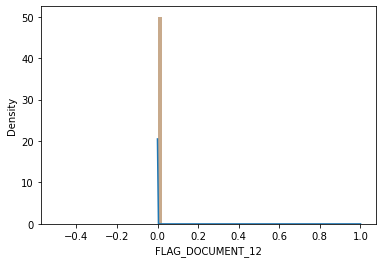

Plot of FLAG_DOCUMENT_13


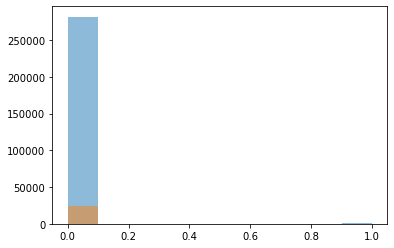

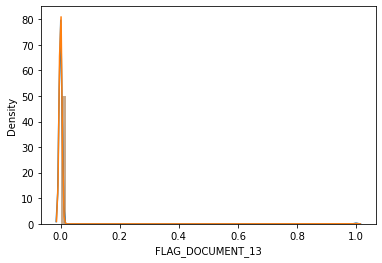

Plot of FLAG_DOCUMENT_14


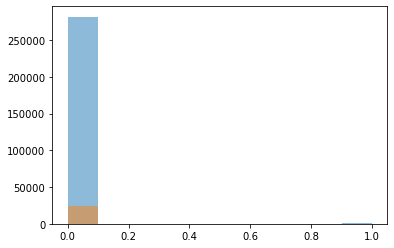

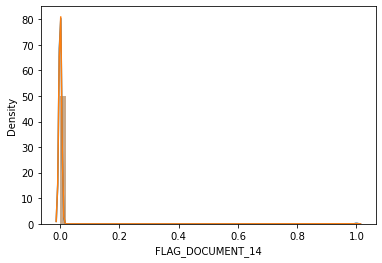

Plot of FLAG_DOCUMENT_15


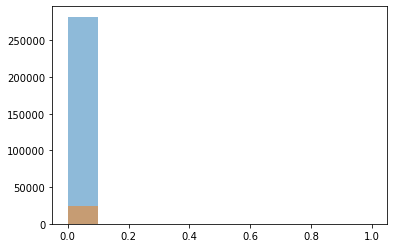

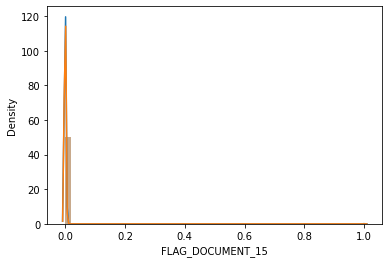

Plot of FLAG_DOCUMENT_16


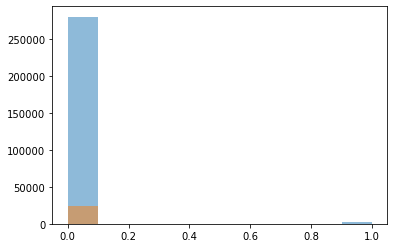

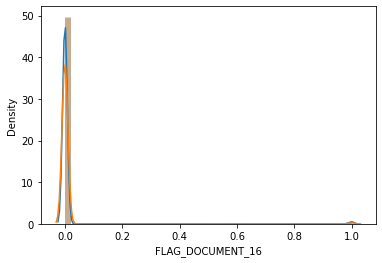

Plot of FLAG_DOCUMENT_17


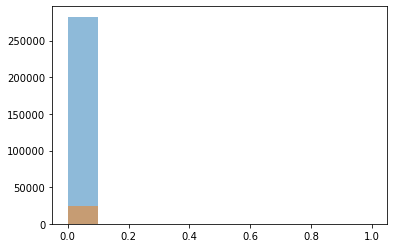

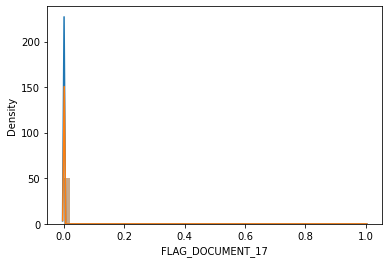

Plot of FLAG_DOCUMENT_18


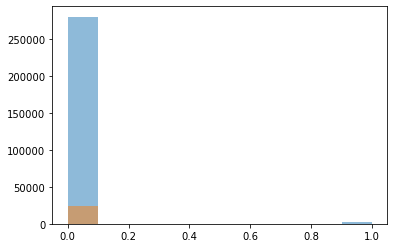

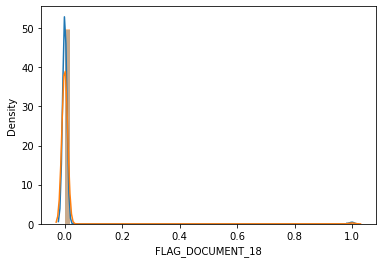

Plot of FLAG_DOCUMENT_19


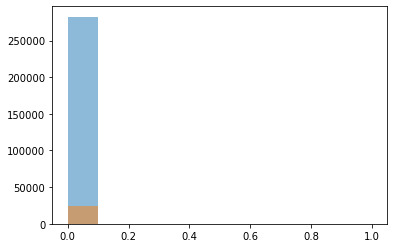

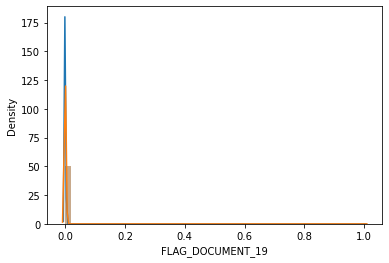

Plot of FLAG_DOCUMENT_20


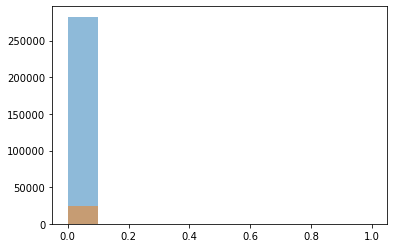

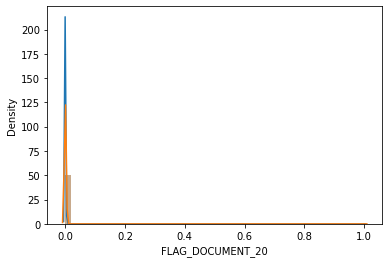

Plot of FLAG_DOCUMENT_21


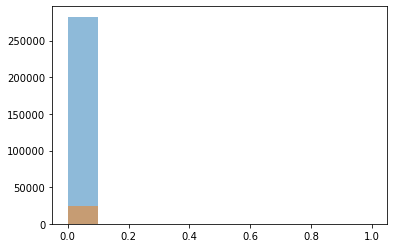

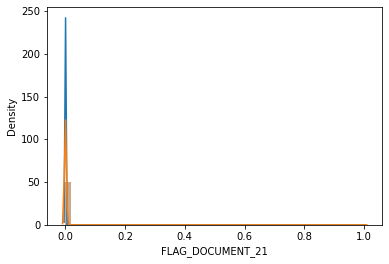

Plot of AMT_REQ_CREDIT_BUREAU_HOUR


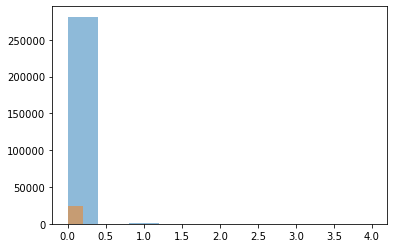

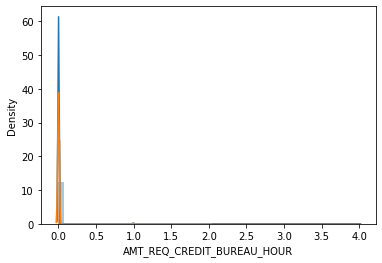

Plot of AMT_REQ_CREDIT_BUREAU_DAY


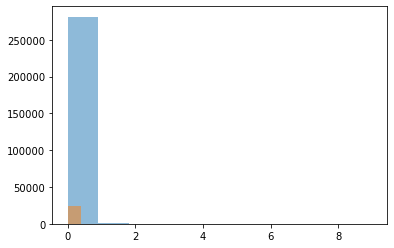

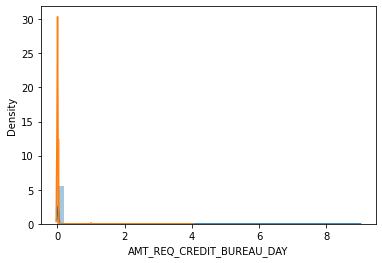

Plot of AMT_REQ_CREDIT_BUREAU_WEEK


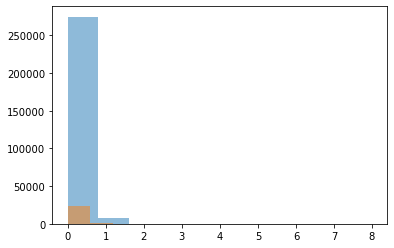

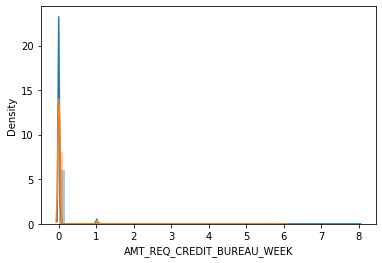

Plot of AMT_REQ_CREDIT_BUREAU_MON


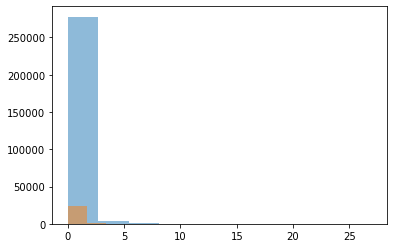

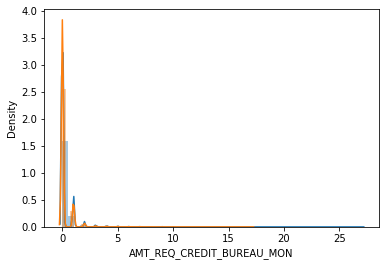

Plot of AMT_REQ_CREDIT_BUREAU_QRT


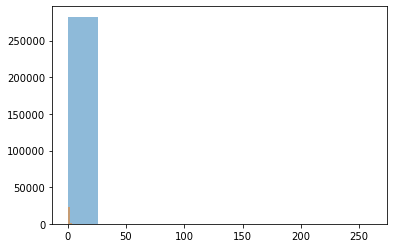

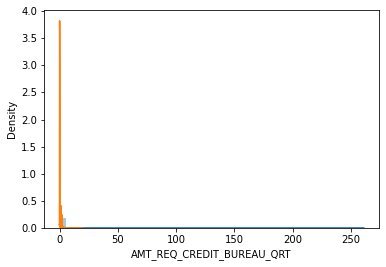

Plot of AMT_REQ_CREDIT_BUREAU_YEAR


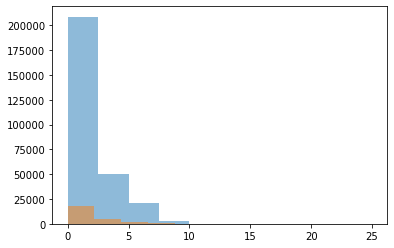

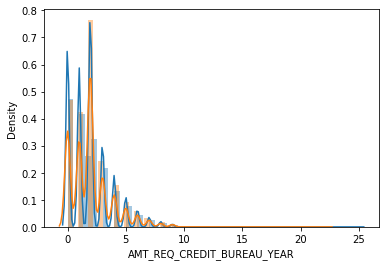

In [249]:
for column in data_numerical:
    title= "Plot of "+column
    print(title)
    plt.hist(data_0[column], alpha=0.5, label='0')
    plt.hist(data_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(data_0[column].dropna(), label='0')
    sns.distplot(data_1[column].dropna(), label='1')
    plt.show()

**Insights:**
* For Amt_Total_Income, the variation of non-defaulters is same as defaulters but the median of total income of non-defaulters is higher.
* Amt_Credit requested by clients has higher variation for non-defaulters while for defaulters its quite low.
* The Annuity_amount, Goods_price requested to credit bureau is about the same as for both type of clients.
* EXT_Source_2 score is better choice for non-defaulters and they also have lower variation. Similarly, EXT_Source_3 score is also better for chpice for non-defaulters.
* For Years_Birth group, median for non-defaulters is 4 which means that the median of age for non-defaulters are in their 40s. Meanwhile,for defaulters the median age is in their 30s.
* Also,for the median number of Years_Employed for non-defautlers is 5 years while for defaulters, its 3 yrs.
* For the region_rating_client=3, as the number of applicants having difficulty in repayment of loan outnumbers the ones without difficulty.

### Importing the Previous Application dataset ###


In [250]:
#Reading the previous application dataset
previous_application= pd.read_csv("previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [251]:
# Checking the shape of previous application
previous_application.shape

(1670214, 37)

 There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times.

In [252]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [253]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

The shape of previous application is (1670214, 37) and length of SK_ID_PREV is also 1670214, but the length of SK ID CURR is 338857, which is less than length of SK_ID PREV, which tells us that there are duplicate number of SK_ID_PREV.

#### Let's merge dataframe: data and previous application based on SK_ID_PREV ####

In [254]:
# Merging both the dataframes
previous_data= application_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR',how='inner')

In [255]:
# Checking shape of the new dataframe
previous_data.shape

(1413701, 118)

In [256]:
previous_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801           25               1             3648.0   
1                    0.003541           45               3             1186.0   
2                    0.003541           45               3             1186.0   
3                    0.003541           45               3             1186.0   
4                    0.010032           52               0             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2      

In [257]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [258]:
previous_application.SK_ID_CURR.value_counts().head()

187868    77
265681    73
173680    72
242412    68
206783    67
Name: SK_ID_CURR, dtype: int64

In [259]:
#Segregating the dataset on Target=0 and Target=1
data_0= application_data.loc[application_data['TARGET']== 0]
data_1= application_data.loc[application_data['TARGET']== 1]

In [260]:
pdata_0= previous_data.loc[previous_data['TARGET']== 0]
pdata_1= previous_data.loc[previous_data['TARGET']== 1]

In [261]:
#Plotting data
def plotting(column, hue):
    col= column
    hue= hue
    fig= plt.figure(figsize=(13,10))
    
    ax1=plt.subplot(2,2,1)
    application_data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(2,2,2)
    df= pd.DataFrame()
    df['0'] = ((data_0[col].value_counts())/len(data_0))
    df['1'] = ((data_1[col].value_counts())/len(data_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')
    
    
    
    ax3 = plt.subplot(2,2,3)
    sns.countplot(x=col, hue=hue, data= pdata_0, ax= ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')
    
   

    ax4 = plt.subplot(2,2,4)
    sns.countplot(x=col, hue=hue, data= pdata_1, ax= ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')
    
    
    fig.tight_layout() #or equivalently, "plt.tight_Layout()"
    plt.show()
    

## Bivariate Analysis ##

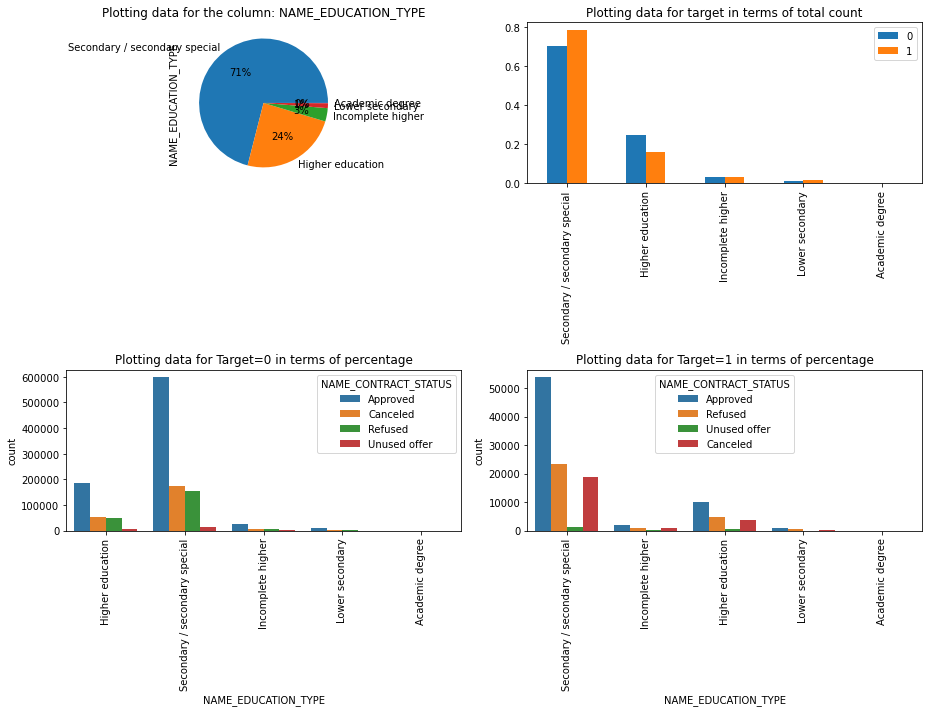

In [262]:
plotting('NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS')

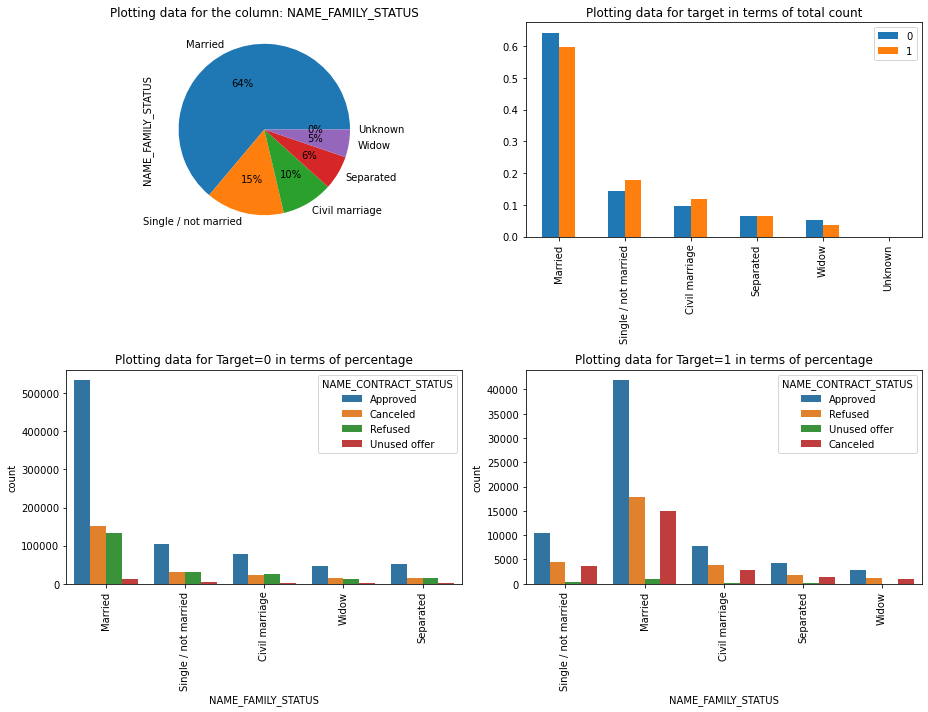

In [263]:
plotting('NAME_FAMILY_STATUS', 'NAME_CONTRACT_STATUS')

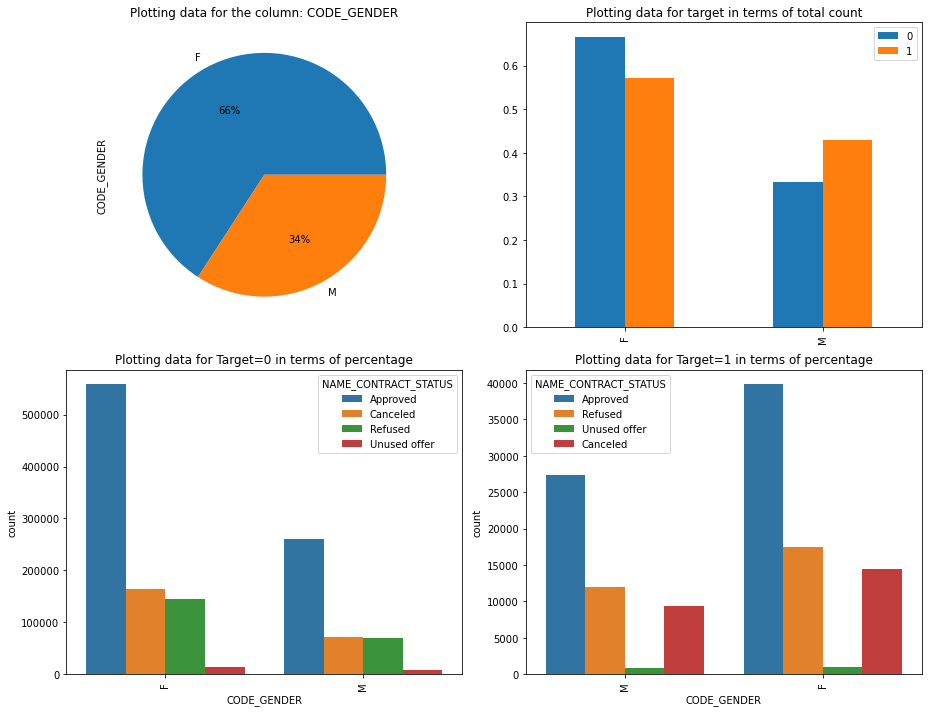

In [264]:
plotting('CODE_GENDER', 'NAME_CONTRACT_STATUS')

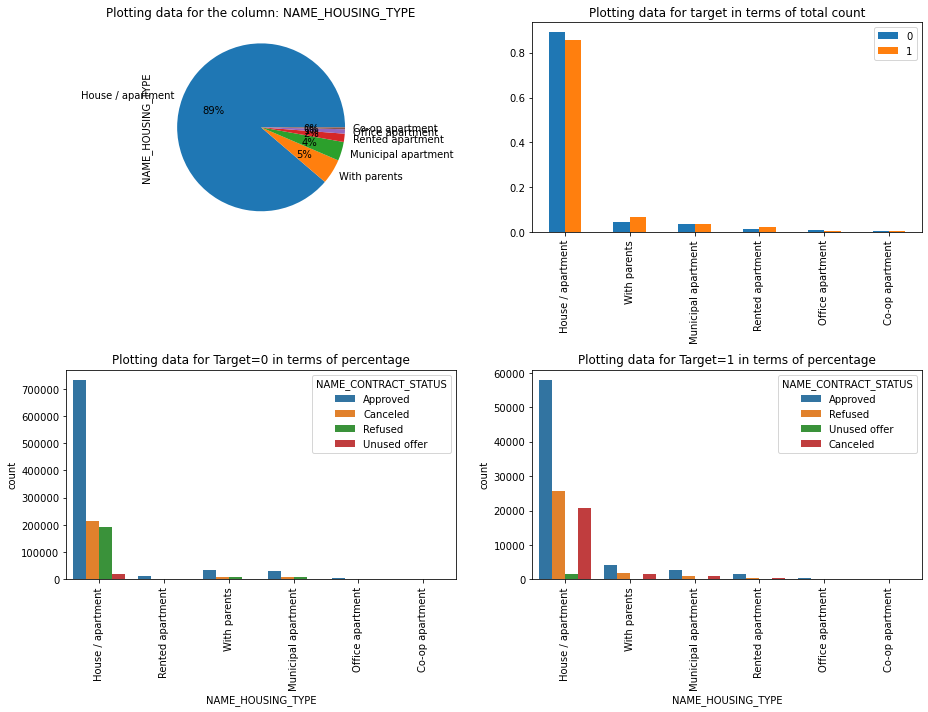

In [265]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

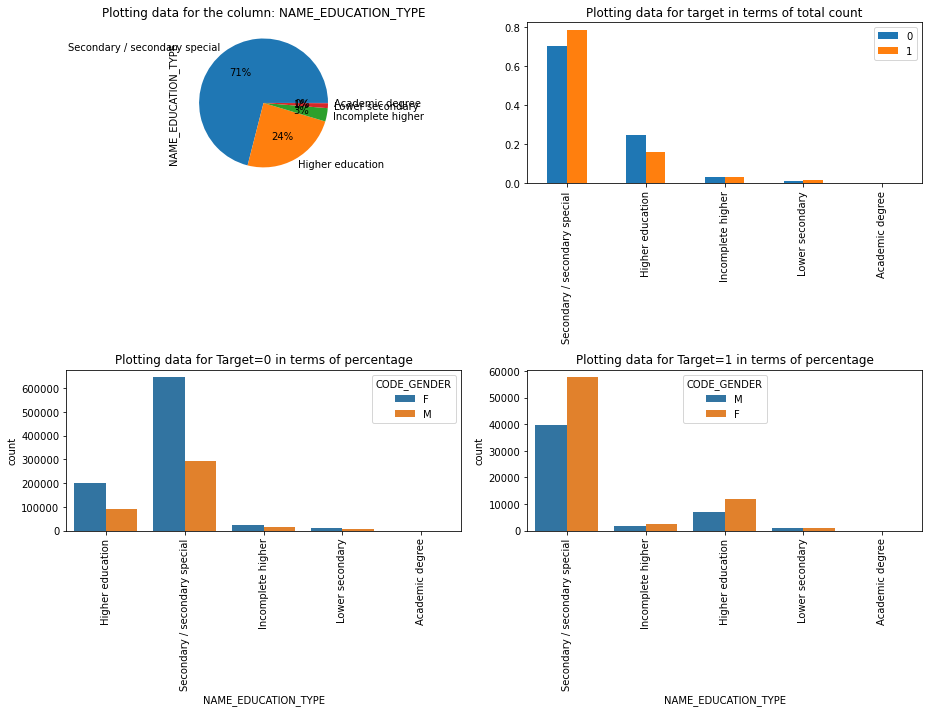

In [266]:
plotting('NAME_EDUCATION_TYPE','CODE_GENDER')

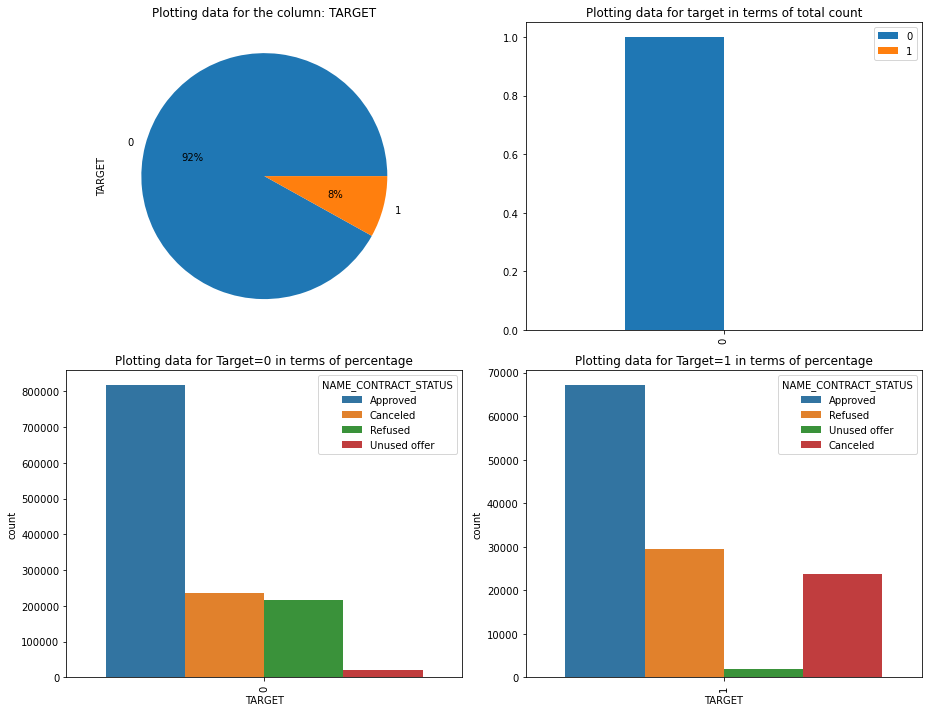

In [267]:
plotting('TARGET','NAME_CONTRACT_STATUS')

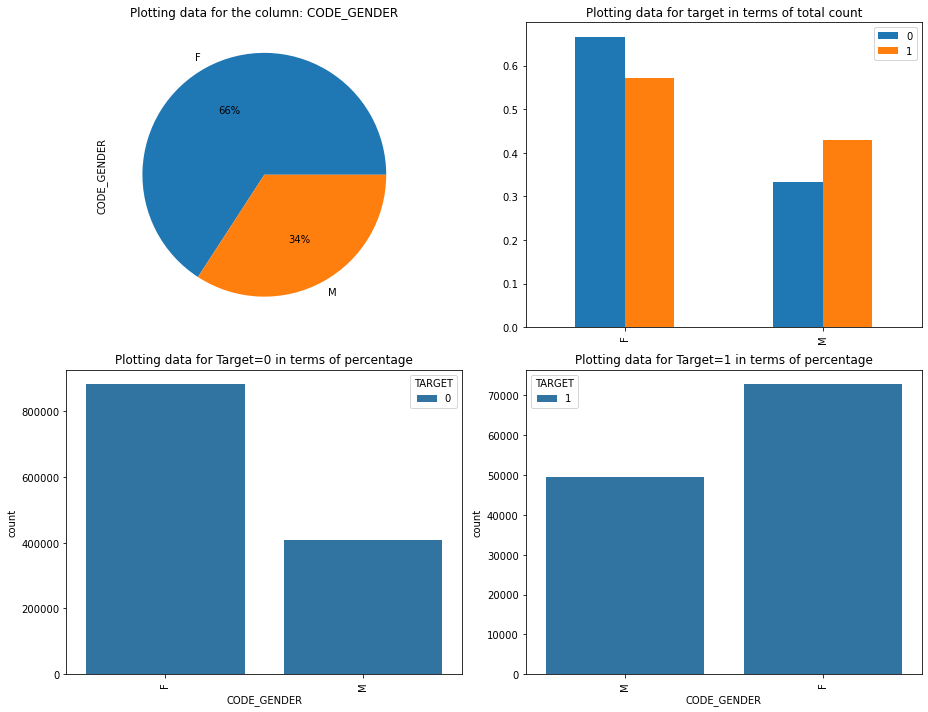

In [268]:
plotting('CODE_GENDER', 'TARGET')

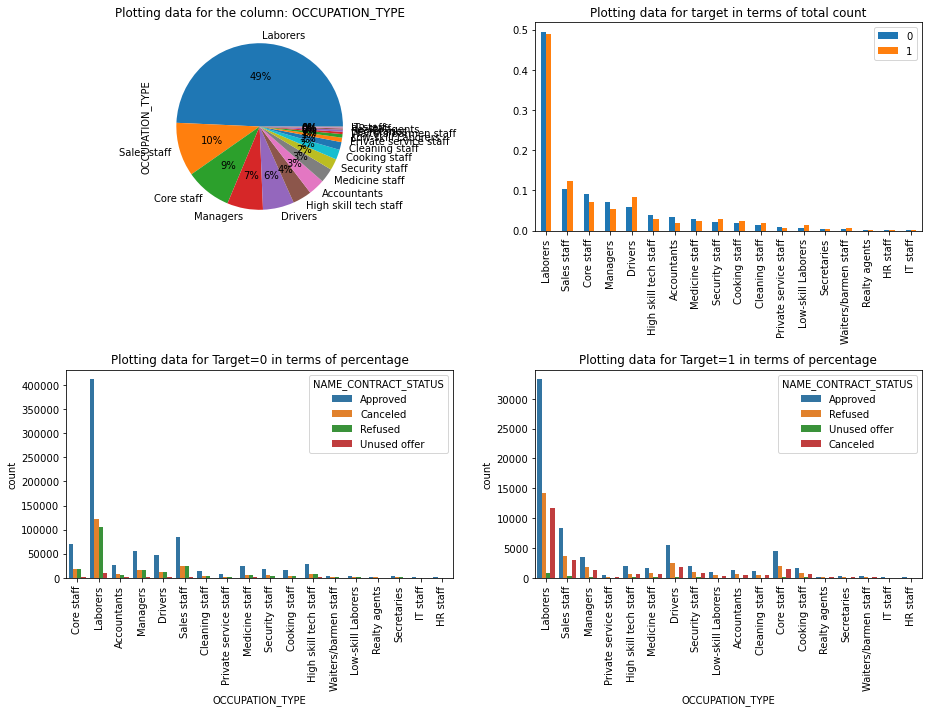

In [269]:
plotting("OCCUPATION_TYPE", "NAME_CONTRACT_STATUS")


**Insights:** From the above plots, people whose loans were approved in the past but are defaulters now are most influenced by these characteristics,

Client is Working or Commercial_Associate
Client has Secondary_Education.
Client is Married
occupation is Laborer or Sales Staff or Realty agent.
Organization type is Industry type 1 or Self Employed.


**Conclusion:**
1. Bank may promote the loan among the occupation type with higher average salary as they are more capable of repaying the loan.
2. Bank must be careful when providing loans to males as the number of males finding it difficult to repay the loan is higher than the rest.
3. We can observe that approved loan applications are higher for applicants with car.  Applicants with car are more capable of repaying without difficulty.
4. Married class is having higher requirement for loans. Major proportion of married class can repay without difficulties but for other classes major portion of applicants find it hard to repay the loan.
5. Bank should be vigilant while providing loan to all applicants  whose housing_type is except house/apartment. Most of the other housing types have issue in repaying the loan.
6. Bank may approve loan for core staff,  manager, high skill tech staff because they are better capable of repaying the loan without any difficulty.
7. For income_type, bank should be more vigilant in providing loans to working class as the major proportion of loan applicants find it difficult to repay the loan
8. The bank should be vigilant when providing loans to applicants of lower age.
9. We can observe that even when the applicants had no difficulty in repayment certain number were refused loan.
10. Bank should be more vigilant in providing loans to working class as the major proportion of loan applicants find it difficult to repay the loan.
